# Transcriptomics Assignment (bulk RNA sequencing)

## Kodai Tsurumi - r0965964

### Title
#### Transcriptomic profiling of substantia nigra and putamen in Parkinson’s disease 

### Organism
*Homo sapiens*

### Source
**GEO accession: GSE136666** \
**Study paper**: "Explorative Combined Lipid and Transcriptomic Profiling of Substantia Nigra and Putamen in Parkinson's Disease" 
(https://pmc.ncbi.nlm.nih.gov/articles/PMC7564986/)

### Summary


The goal of the study was to identify differentially expressed genes (DEGs) in the substantia nigra (SN) and putamen samples from Parkinson's disease (PD) patients, compared to age-matched healthy controls. Bulk RNA sequencing was performed to analyze the gene expression differences between the substantia nigra of PD patients and healthy controls.

The reference paper reported the gene expression pathways involved in "protein folding" and "neurotransmitter transport" as top-enriched pathways in the substantia nigra of PD patients, as these processes are essential to the normal functioning of dopaminergic neurons.

For this assignment, I focused on the substantia nigra, analyzing RNA-seq data from four samples—two from control individuals (one male and one female) and two from Parkinson's disease (PD) patients (one male and one female). 

The analysis aims to explore the DEG profiles and identify molecular pathways potentially implicated in PD 
pathogenesis. 



**Substantia nigra**: A critical brain region in the midbrain that contains dopaminergic neurons, which play a central role in reward processing, movement, and motor control. The progressive loss of dopaminergic neurons in this area is one of the hallmark pathological features of PD.

image 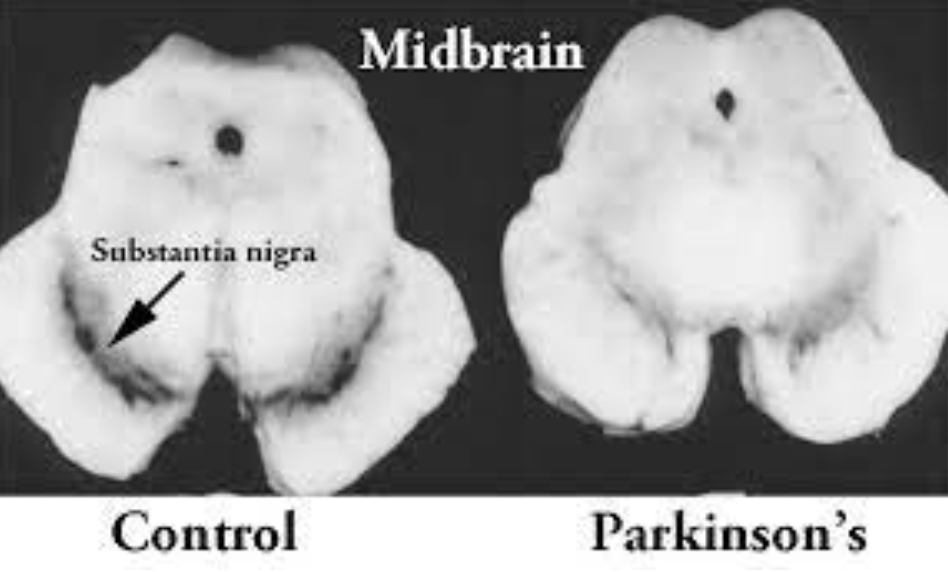

**Figure: Substantia nigra of normal patient (left) and patient with PD (right)**:
    Substantia nigra with PD shows the loss of black area
    (imgae credit: NeuroLab 360)

## Step 0: set up

In [26]:
pwd

/mnt/storage/r0965964/jupyternotebooks/transcriptomics_assignment


In [2]:
mkdir -p /mnt/storage/$USER/jupyternotebooks/transcriptomics_assignment

In [1]:
cd /mnt/storage/$USER/jupyternotebooks/transcriptomics_assignment

In [2]:
# Before running fastq-dump for the first time also run the command below
vdb-config -s /repository/user/cache-disabled=true

## Step 1: get reads

In [ ]:
mkdir -p fastq_files_test

In [4]:
# Download the fastq files for two controls (SRR10044440, SRR10044441)
# Download the fastq files for two Substantia nigra cells in Parkinson’s disease (SRR10044444, SRR10044446)

fastq-dump \
    SRR10044440 SRR10044441 \
    SRR10044444 SRR10044446 \
    --split-files \
    --outdir fastq_files_test \
    --verbose \
    -X 5
# --verbose flag prints detailed information about the process as fastq-dump runs

Preference setting is: Prefer SRA Normalized Format files with full base quality scores if available.
SRR10044440 is an SRA Normalized Format file with full base quality scores.
Read 5 spots for SRR10044440
Written 5 spots for SRR10044440
SRR10044441 is an SRA Normalized Format file with full base quality scores.
Read 5 spots for SRR10044441
Written 5 spots for SRR10044441
SRR10044444 is an SRA Normalized Format file with full base quality scores.
Read 5 spots for SRR10044444
Written 5 spots for SRR10044444
SRR10044446 is an SRA Normalized Format file with full base quality scores.
Read 5 spots for SRR10044446
Written 5 spots for SRR10044446


In [6]:
ls fastq_files_test

SRR10044440_1.fastq  SRR10044441_2.fastq  SRR10044446_1.fastq
SRR10044440_2.fastq  SRR10044444_1.fastq  SRR10044446_2.fastq
SRR10044441_1.fastq  SRR10044444_2.fastq


In [7]:
# display the head of the file
head -n10 fastq_files_test/SRR10044440_1.fastq

@SRR10044440.1 1 length=50
NCCGTCACCACGCTGGTGCCCACAGCTGCATCCTCATTGAGCCGCACTGT
+SRR10044440.1 1 length=50
#<<<BF<FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFBFFBFFBFFFFFF
@SRR10044440.2 2 length=50
CCTTTGCACGGTTAGGGTACCGCGGCCGTTAAACATGTGTCACTGGGCAG
+SRR10044440.2 2 length=50
//<<<FFFFFFFFFF<FFFFFBBFBFFFFFFFBFFFFFFFFFFFFFFFFB
@SRR10044440.3 3 length=50
TCACCAAGTTCTGTATCTCATACTTTGAGCTCCATTAGCTGAGTTCTAAC


In [8]:
mkdir -p fastq_files

mkdir: cannot create directory ‘fastq_files’: File exists


: 1

### Download .fastq file using fastq-dump. 

In [2]:
# download the entire reads (Approx.1h)
fastq-dump \
    SRR10044440 SRR10044441 \
    SRR10044444 SRR10044446 \
    --split-files \
    --outdir fastq_files \
    --verbose 

Preference setting is: Prefer SRA Normalized Format files with full base quality scores if available.
SRR10044440 is an SRA Normalized Format file with full base quality scores.
Read 29355838 spots for SRR10044440
Written 29355838 spots for SRR10044440
SRR10044441 is an SRA Normalized Format file with full base quality scores.
Read 32382216 spots for SRR10044441
Written 32382216 spots for SRR10044441
SRR10044444 is an SRA Normalized Format file with full base quality scores.
Read 40767224 spots for SRR10044444
Written 40767224 spots for SRR10044444
SRR10044446 is an SRA Normalized Format file with full base quality scores.
Read 33862269 spots for SRR10044446
Written 33862269 spots for SRR10044446


In [4]:
ls fastq_files

SRR10044440_1.fastq  SRR10044441_2.fastq  SRR10044446_1.fastq
SRR10044440_2.fastq  SRR10044444_1.fastq  SRR10044446_2.fastq
SRR10044441_1.fastq  SRR10044444_2.fastq


In [5]:
# Rename files
# C_SN_F: Control Female
# C_SN_M: Control Male
# PD_SN_F: PD Female
# PD_SN_M: PD Male
mv fastq_files/SRR10044440_1.fastq fastq_files/C_SN_F1.fastq
mv fastq_files/SRR10044440_2.fastq fastq_files/C_SN_F2.fastq
mv fastq_files/SRR10044441_1.fastq fastq_files/C_SN_M1.fastq
mv fastq_files/SRR10044441_2.fastq fastq_files/C_SN_M2.fastq
mv fastq_files/SRR10044444_1.fastq fastq_files/PD_SN_F1.fastq
mv fastq_files/SRR10044444_2.fastq fastq_files/PD_SN_F2.fastq
mv fastq_files/SRR10044446_1.fastq fastq_files/PD_SN_M1.fastq
mv fastq_files/SRR10044446_2.fastq fastq_files/PD_SN_M2.fastq

In [37]:
ls fastq_files

C_SN_F1.fastq  C_SN_M1.fastq  PD_SN_F1.fastq  PD_SN_M1.fastq
C_SN_F2.fastq  C_SN_M2.fastq  PD_SN_F2.fastq  PD_SN_M2.fastq


In [12]:
head -n10 fastq_files/C_SN_F1.fastq

@SRR10044440.1 1 length=50
NCCGTCACCACGCTGGTGCCCACAGCTGCATCCTCATTGAGCCGCACTGT
+SRR10044440.1 1 length=50
#<<<BF<FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFBFFBFFBFFFFFF
@SRR10044440.2 2 length=50
CCTTTGCACGGTTAGGGTACCGCGGCCGTTAAACATGTGTCACTGGGCAG
+SRR10044440.2 2 length=50
//<<<FFFFFFFFFF<FFFFFBBFBFFFFFFFBFFFFFFFFFFFFFFFFB
@SRR10044440.3 3 length=50
TCACCAAGTTCTGTATCTCATACTTTGAGCTCCATTAGCTGAGTTCTAAC


In [7]:
# counting lines: wc -l
cat fastq_files/C_SN_F1.fastq | wc -l

117423352


In [8]:
# number of read: lines/4
echo 117423352/4 | bc #the number of reads 

29355838


## Step 2 Quality control using FASTQC

In [9]:
# a directory to store the FastQC report and run FastQC.
mkdir -p QC_results

In [11]:
# Run the FastQC tool on all FASTQ file.
# FastQC tool: /usr/bin/fastqc
fastqc fastq_files/*.fastq -o QC_results

Started analysis of C_SN_F1.fastq
Approx 5% complete for C_SN_F1.fastq
Approx 10% complete for C_SN_F1.fastq
Approx 15% complete for C_SN_F1.fastq
Approx 20% complete for C_SN_F1.fastq
Approx 25% complete for C_SN_F1.fastq
Approx 30% complete for C_SN_F1.fastq
Approx 35% complete for C_SN_F1.fastq
Approx 40% complete for C_SN_F1.fastq
Approx 45% complete for C_SN_F1.fastq
Approx 50% complete for C_SN_F1.fastq
Approx 55% complete for C_SN_F1.fastq
Approx 60% complete for C_SN_F1.fastq
Approx 65% complete for C_SN_F1.fastq
Approx 70% complete for C_SN_F1.fastq
Approx 75% complete for C_SN_F1.fastq
Approx 80% complete for C_SN_F1.fastq
Approx 85% complete for C_SN_F1.fastq
Approx 90% complete for C_SN_F1.fastq
Approx 95% complete for C_SN_F1.fastq
Analysis complete for C_SN_F1.fastq
Started analysis of C_SN_F2.fastq
Approx 5% complete for C_SN_F2.fastq
Approx 10% complete for C_SN_F2.fastq
Approx 15% complete for C_SN_F2.fastq
Approx 20% complete for C_SN_F2.fastq
Approx 25% complete for 

**FastQC result .html**

**Example**: Per base sequence quality for C_SN_F2.fastq
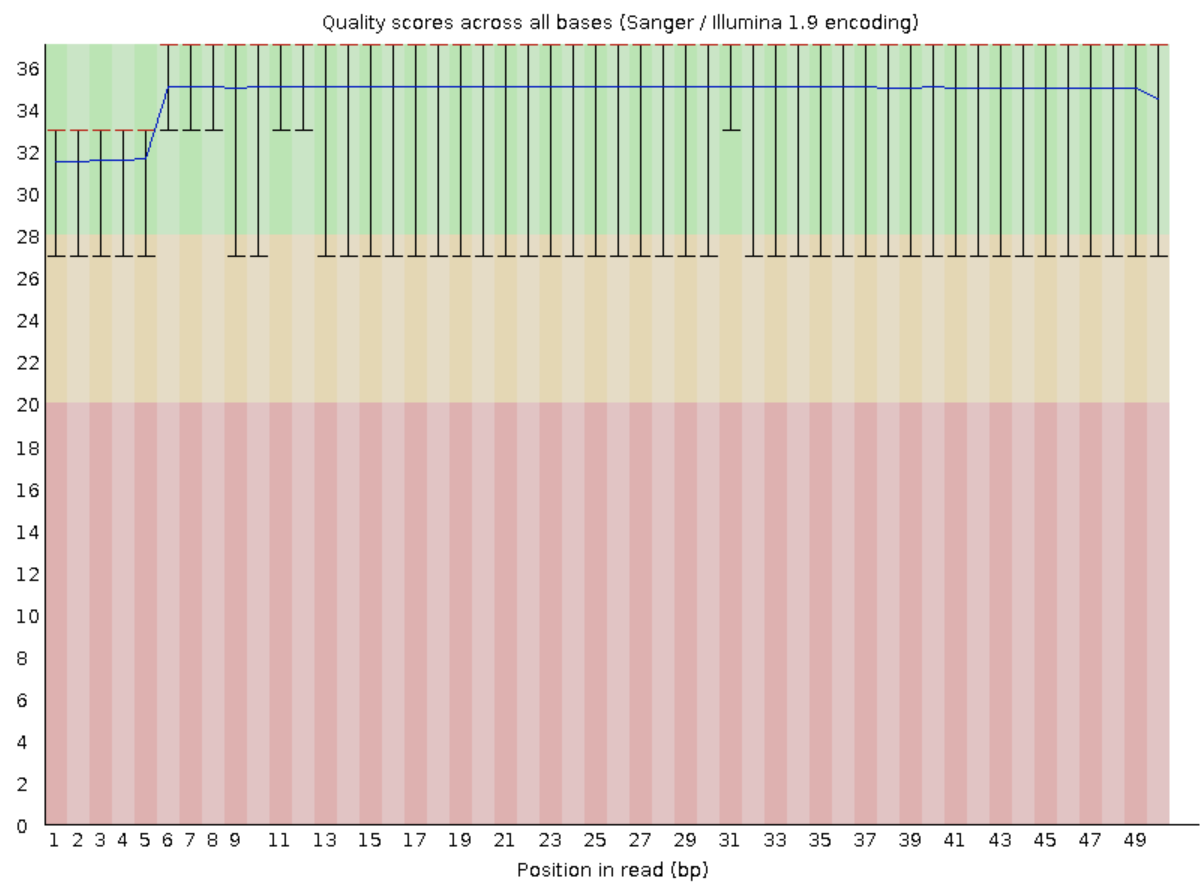

The other fastq files have overall good sequence quality.

## Step 3: Alligning reads to a reference genome

**Align .fastq file to reference genome (hg38) using the STAR aligner** (approx.1h)

The reads are aligned to the hg38 human reference genome. The pre-generated database is taken from:

    /mnt/storage/sdewin/STAR/star_db_hg38
    
    # Directly output a bam file instead of generating a sam file.
    --outSAMtype BAM SortedByCoordinate 

**.bam**: binary version of the SAM (Sequence Alignment/Map) file format


In [30]:
STAR \
    --genomeDir /mnt/storage/db/star/hg38/genomedir/ \
    --runThreadN 20 \
    --readFilesIn fastq_files/C_SN_F1.fastq \
    --outFileNamePrefix alignment/C_SN_F1. \
    --outSAMtype BAM SortedByCoordinate 

Nov 10 16:35:24 ..... started STAR run
Nov 10 16:35:24 ..... loading genome
Nov 10 16:38:28 ..... started mapping
Nov 10 16:40:11 ..... started sorting BAM
Nov 10 16:41:12 ..... finished successfully


In [23]:
mkdir -p alignment

# Align fastq files to hg38
FILES_TO_ALIGN=`ls fastq_files | grep fastq`
echo "Following files will be aligned:" 
echo ${FILES_TO_ALIGN} | sed "s/ /, /g"    #Print fastq files and separate each file name with commas
for fastq_file in ${FILES_TO_ALIGN}        #Loop over all fastq files
do
    SAMPLE_NAME=`echo ${fastq_file} | cut -f 1 -d .` #Get the sample name by remove '.fastq'
    echo "Aligning ${SAMPLE_NAME}" 
    STAR \
        --genomeDir /mnt/storage/db/star/hg38/genomedir/ \
        --runThreadN 20 \
        --readFilesIn fastq_files/${fastq_file} \
        --outFileNamePrefix alignment/${SAMPLE_NAME}. \
        --outSAMtype BAM SortedByCoordinate # Directly output a bam file instead of generating a sam file.
done

Following files will be aligned:
C_SN_F1.fastq, C_SN_F2.fastq, C_SN_M1.fastq, C_SN_M2.fastq, PD_SN_F1.fastq, PD_SN_F2.fastq, PD_SN_M1.fastq, PD_SN_M2.fastq
Aligning C_SN_F1
Nov 10 16:03:14 ..... started STAR run
Nov 10 16:03:14 ..... loading genome



In [15]:
# display .bam file in 'alignment/'
ls alignment | grep bam

C_SN_F1.Aligned.sortedByCoord.out.bam
C_SN_F2.Aligned.sortedByCoord.out.bam
C_SN_M1.Aligned.sortedByCoord.out.bam
C_SN_M2.Aligned.sortedByCoord.out.bam
PD_SN_F1.Aligned.sortedByCoord.out.bam
PD_SN_F2.Aligned.sortedByCoord.out.bam
PD_SN_M1.Aligned.sortedByCoord.out.bam
PD_SN_M2.Aligned.sortedByCoord.out.bam


### Mapping Stats

In [16]:
# Display mapping stats for one of the fastq files (C_SN_F1.fastq):
cat alignment/C_SN_F1.Log.final.out

                                 Started job on |	Nov 10 14:14:13
                             Started mapping on |	Nov 10 14:18:24
                                    Finished on |	Nov 10 14:20:11
       Mapping speed, Million of reads per hour |	987.67

                          Number of input reads |	29355838
                      Average input read length |	50
                                    UNIQUE READS:
                   Uniquely mapped reads number |	25480635
                        Uniquely mapped reads % |	86.80%
                          Average mapped length |	49.80
                       Number of splices: Total |	2475471
            Number of splices: Annotated (sjdb) |	2447995
                       Number of splices: GT/AG |	2449228
                       Number of splices: GC/AG |	18726
                       Number of splices: AT/AC |	1855
               Number of splices: Non-canonical |	5662
                      Mismatch rate per base, % |	0.27%
              

In [28]:
# View the BAM file using 'samtools'
samtools view alignment/C_SN_F2.Aligned.sortedByCoord.out.bam | head -n 5

SRR10044440.9334491	272	1	10535	0	50M	*	0	0	GTACCACCGAAATCTGTGCAGAGGAGAACGCAGCTCCGCCCTCGCGGTGC	FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFBBBBB	NH:i:6	HI:i:2	AS:i:47	nM:i:1
SRR10044440.13152181	16	1	10561	1	1S49M	*	0	0	GAACGCAGCTCCGCCCTCGCGGTGCTCTCCGGGTCTGTGCTGAGGAGAAC	FFFFFFFFFFFFFFFFFFFFFFFBFFBFBFFFFF<FFFFFFFFFFBBBBB	NH:i:3	HI:i:1	AS:i:48	nM:i:0
SRR10044440.3684012	16	1	10565	255	50M	*	0	0	CAGCTCCGCCCTCGCGGTGCTCTCCGGGTCTGTGCTGAGGAGAACGCAAC	FFFFFFFFFFFBFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFBBBB/	NH:i:1	HI:i:1	AS:i:49	nM:i:0
SRR10044440.14395288	272	1	10572	3	50M	*	0	0	GCCCTCGCGGTGCTCTCCGGGTCTGCGCTGAGGAGAACGCAACTCCGCCG	FF<FFFFFFFFFFFFFFBFFFFBFFFFFFFFF<F<FFFFFFB</BBBBBB	NH:i:2	HI:i:2	AS:i:47	nM:i:1
SRR10044440.27820682	272	1	10572	3	50M	*	0	0	GCCCTCGCGGTGCTCTCCGGTTCTGTGCTGAGGAGAACCCAACTCCGCCG	FB//B/BF/BFFF<//F</</F<</B</FFFBFFFBF<FB/7</</B/BB	NH:i:2	HI:i:2	AS:i:45	nM:i:2
samtools view: writing to standard output failed: Broken pipe
samtools view: error closing standard output: -1


## Step 4: visualize data in a genome browser (IGV)
The alligned reads of PD_SN_F vs C_SN_F were visualized in [IGV](https://igv.org/).

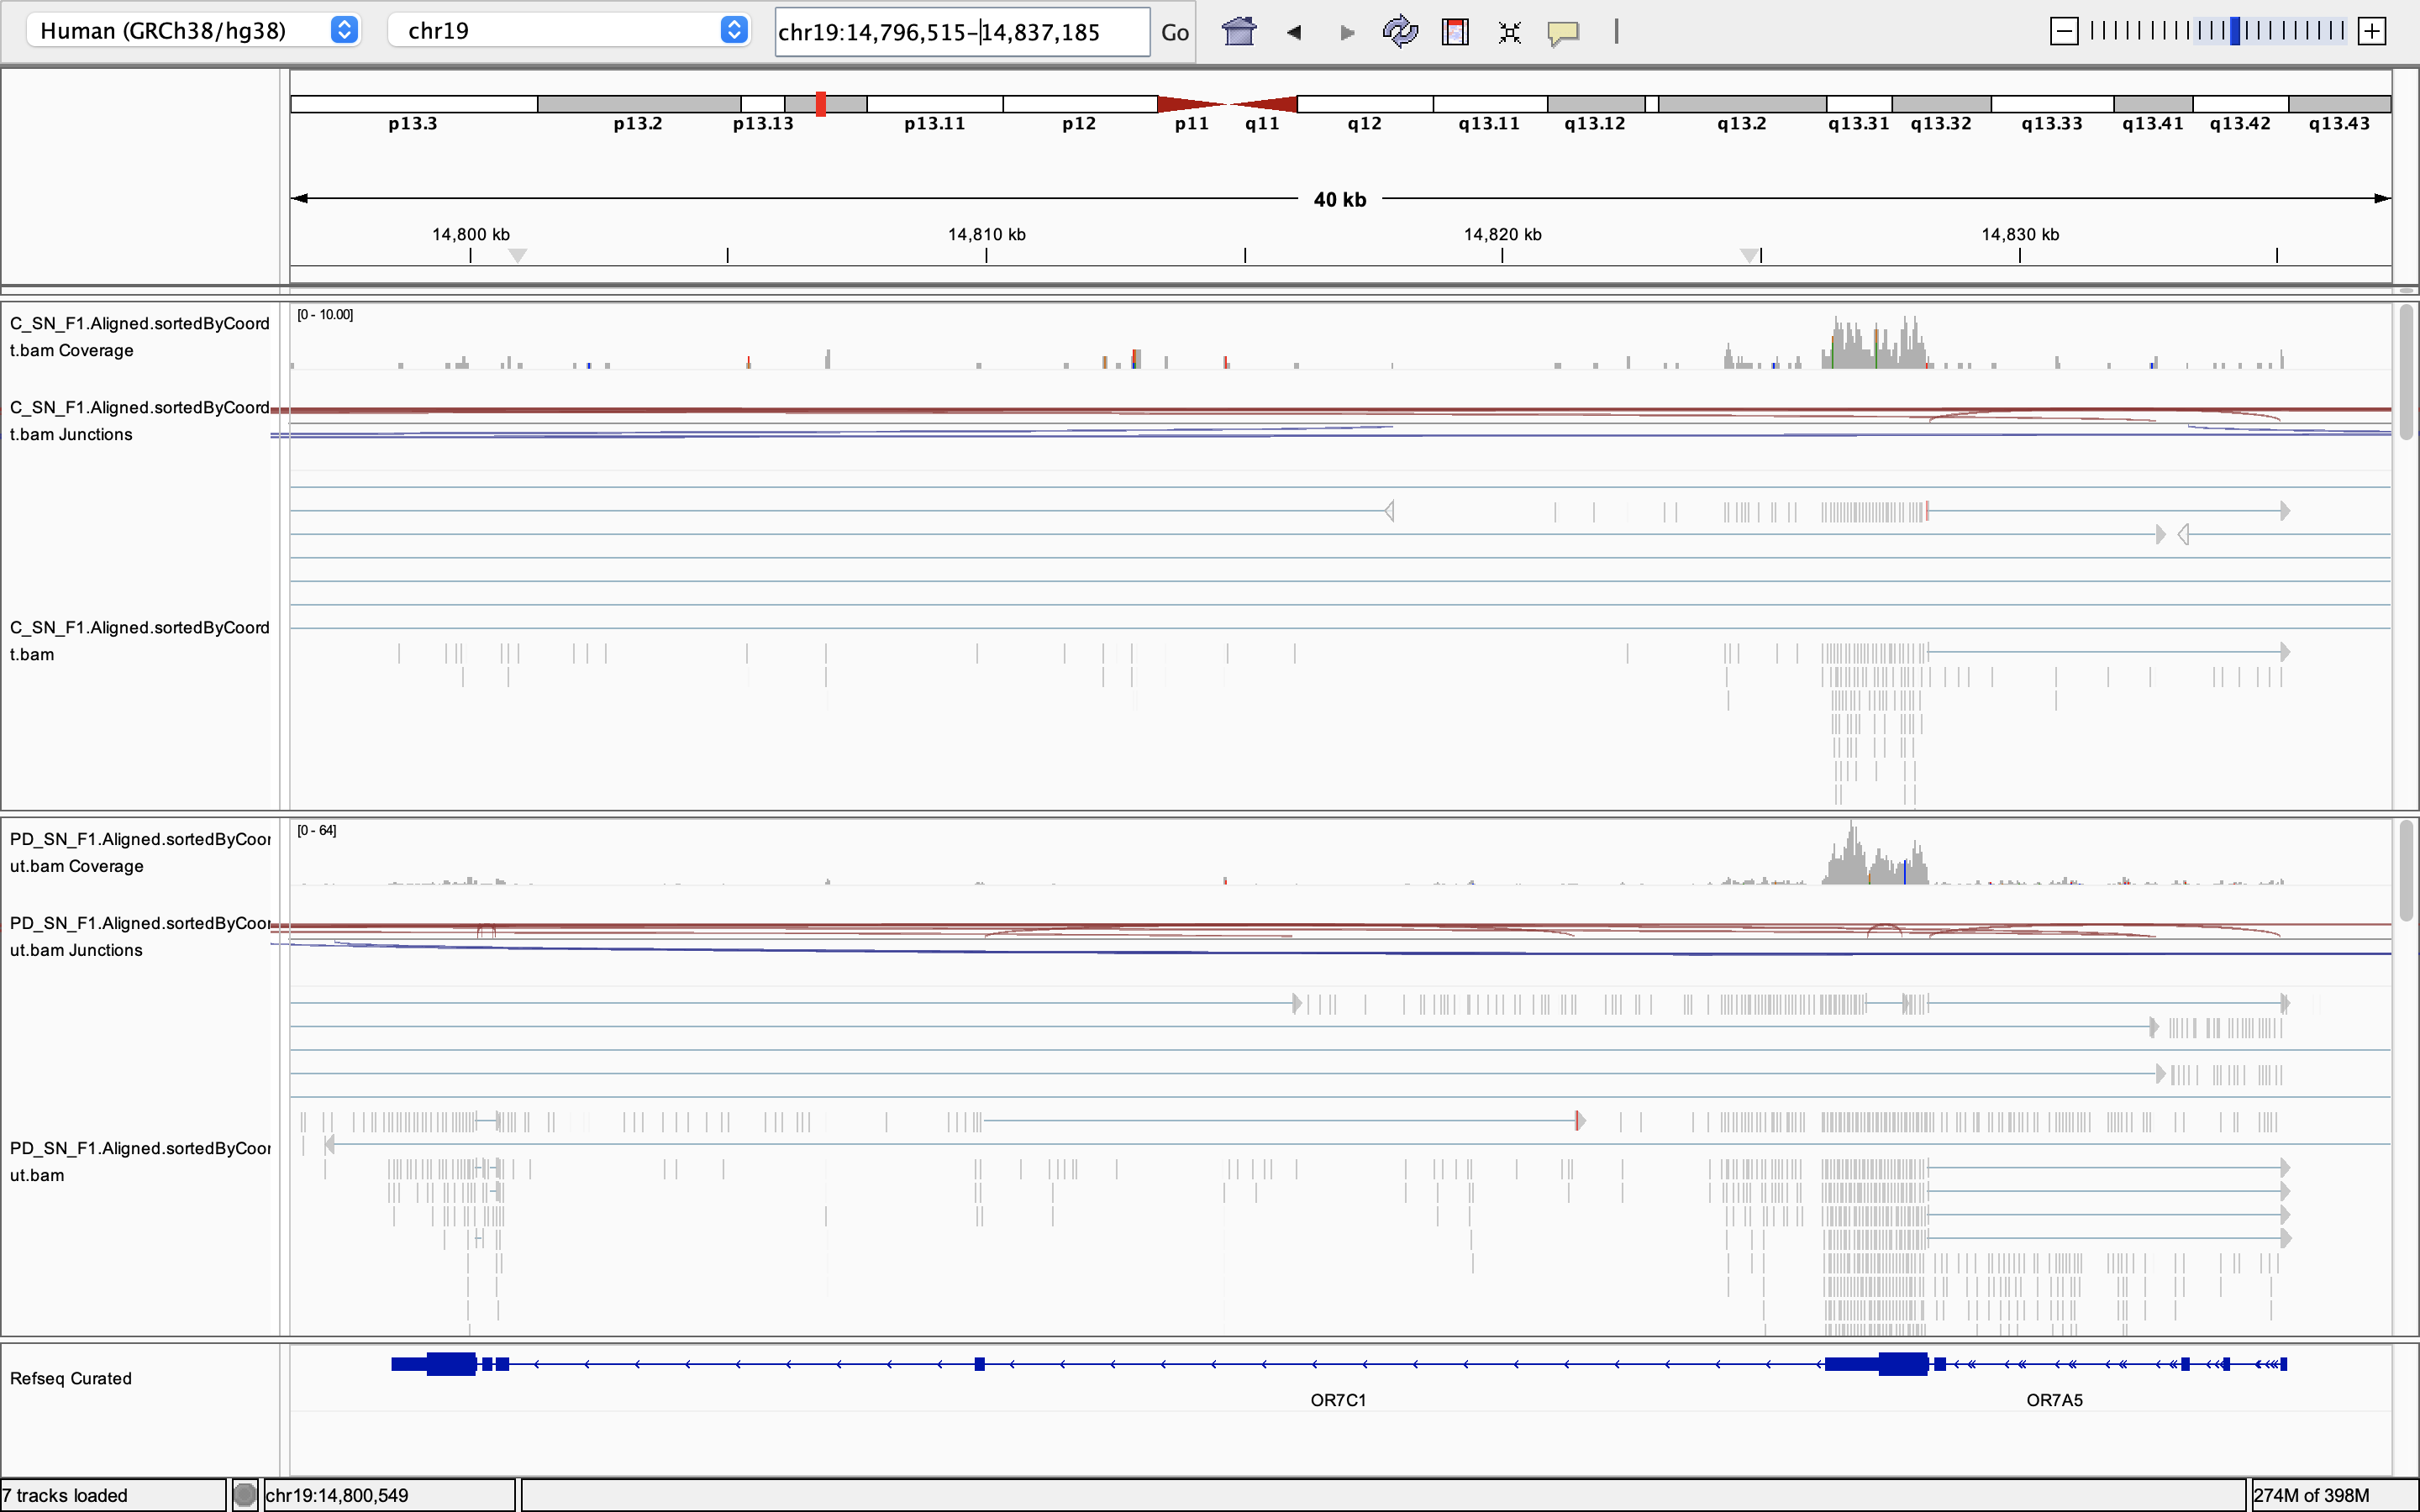


As an example, the coverage across the OR7C1 gene, which was reported as significantly upregulated in Parkinson’s disease (PD) individuals compared to controls, was examined.

The difference in coverage between PD and control samples appears subtle and not distinctly pronounced. 

In [20]:
# Index the bam files: samtools index; .bam -> .bam.bai
for bam_file in `ls alignment/*.bam`
do
    echo "Indexing: ${bam_file}"
    samtools index -b ${bam_file}
done

Indexing: alignment/C_SN_F1.Aligned.sortedByCoord.out.bam
Indexing: alignment/C_SN_F2.Aligned.sortedByCoord.out.bam
Indexing: alignment/C_SN_M1.Aligned.sortedByCoord.out.bam
Indexing: alignment/C_SN_M2.Aligned.sortedByCoord.out.bam
Indexing: alignment/PD_SN_F1.Aligned.sortedByCoord.out.bam
Indexing: alignment/PD_SN_F2.Aligned.sortedByCoord.out.bam
Indexing: alignment/PD_SN_M1.Aligned.sortedByCoord.out.bam
Indexing: alignment/PD_SN_M2.Aligned.sortedByCoord.out.bam


In [31]:
# Display how many reads mapped to each chromosome:
samtools idxstats alignment/C_SN_F1.Aligned.sortedByCoord.out.bam 
# The commands outputs a tab delimited file with the following columns:
# Col 1 chromosome no.
# Col 2 length of the chromosoem
# Col 3 number of reads mapped to this chromosome
# Col 4 number of unmapped read fragments

# Looks reads are successfully mapped 

[W::hts_idx_load2] The index file is older than the data file: alignment/C_SN_F1.Aligned.sortedByCoord.out.bam.bai
1	248956422	3720015	0
2	242193529	1851767	0
3	198295559	1591568	0
4	190214555	974980	0
5	181538259	1524528	0
6	170805979	1340925	0
7	159345973	1393810	0
8	145138636	924474	0
9	138394717	1125886	0
10	133797422	1025888	0
11	135086622	1694653	0
12	133275309	1407489	0
13	114364328	531680	0
14	107043718	880366	0
15	101991189	862519	0
16	90338345	1041378	0
17	83257441	1785436	0
18	80373285	1125467	0
19	58617616	1335916	0
20	64444167	702903	0
21	46709983	699423	0
22	50818468	542709	0
MT	16569	5249840	0
X	156040895	1260673	0
Y	57227415	35359	0
*	0	0	0


In [32]:
# Display info on the different SAM flags present in the file:
samtools flagstat alignment/C_SN_F1.Aligned.sortedByCoord.out.bam

34629652 + 0 in total (QC-passed reads + QC-failed reads)
5755504 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
34629652 + 0 mapped (100.00% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


## Step 5: count number of reads overlapping each gene.

Count how many reads overlap each gene (for each sample) 
-> generate a count matrix for identifying genes for which the expression is different between our two conditions.

The `featureCounts` program is used, along with a GTF file containing genomic features (i.e. genes, exons, introns, ...) along with their genomic locations and other metadata.

A gtf file for hg38 can be found at this location:

/mnt/storage/db/star/hg38/gtfFile/Homo_sapiens.GRCh38.90.gtf

In [33]:
# Make symbolic link to the file 'Homo_sapiens.GRCh38.90.gtf' in the current directory.
ln -sf /mnt/storage/db/star/hg38/gtfFile/Homo_sapiens.GRCh38.90.gtf .

**Count the reads overlapping these features:**

In [34]:
head Homo_sapiens.GRCh38.90.gtf

#!genome-build GRCh38.p10
#!genome-version GRCh38
#!genome-date 2013-12
#!genome-build-accession NCBI:GCA_000001405.25
#!genebuild-last-updated 2017-06
1	havana	gene	11869	14409	.	+	.	gene_id "ENSG00000223972"; gene_version "5"; gene_name "DDX11L1"; gene_source "havana"; gene_biotype "transcribed_unprocessed_pseudogene";
1	havana	transcript	11869	14409	.	+	.	gene_id "ENSG00000223972"; gene_version "5"; transcript_id "ENST00000456328"; transcript_version "2"; gene_name "DDX11L1"; gene_source "havana"; gene_biotype "transcribed_unprocessed_pseudogene"; transcript_name "DDX11L1-202"; transcript_source "havana"; transcript_biotype "processed_transcript"; tag "basic"; transcript_support_level "1";
1	havana	exon	11869	12227	.	+	.	gene_id "ENSG00000223972"; gene_version "5"; transcript_id "ENST00000456328"; transcript_version "2"; exon_number "1"; gene_name "DDX11L1"; gene_source "havana"; gene_biotype "transcribed_unprocessed_pseudogene"; transcript_name "DDX11L1-202"; transcript_source "hav

In [36]:
mkdir -p counts

#-Q 10 only count reads with a minimum mapping quality of 10
#-g gene_name use gene_name as feature names (you can also use gene_id, although this is less human readable)
#-a gencode.v26.primary_assembly.annotation.gtf specify the annotaiton file
#-o counts/C_SN.count specify the output file
#alignment/*.bam count for all the bam files in the alignment folder
featureCounts \
    -Q 10 \
    -g gene_name \
    -a Homo_sapiens.GRCh38.90.gtf \
    -o counts/C_PD_SN.counts \
    alignment/*.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 8 BAM files                                      ||
||                           S alignment/C_SN_F1.Aligned.sortedByCoord.ou ... ||
||                           S alignment/C_SN_F2.Aligned.sortedByCoord.ou ... ||
||                           S alignment/C_SN_M1.Aligned.sortedByCoord.ou ... ||
||                           S alignment/C_SN_M2.Aligned.sortedBy

||    Total reads : 40531246                                                  ||
||    Successfully assigned reads : 23729156 (58.5%)                          ||
||    Running time : 1.39 minutes                                             ||
||                                                                            ||
||                         Read assignment finished.                          ||
||                                                                            ||
|| Summary of counting results can be found in file "counts/C_PD_SN.counts.s  ||
|| ummary"                                                                    ||
||                                                                            ||
\\===================== http://subread.sourceforge.net/ ======================//



In [38]:
ls counts

C_PD_SN.counts  C_PD_SN.counts.summary


In [39]:
# See raw output file before formatting
# Contains information (including the genomic location of each feature) and some metadata starting with the "#" symbol
head counts/C_PD_SN.counts 

# Program:featureCounts v1.6.0; Command:"featureCounts" "-Q" "10" "-g" "gene_name" "-a" "Homo_sapiens.GRCh38.90.gtf" "-o" "counts/C_PD_SN.counts" "alignment/C_SN_F1.Aligned.sortedByCoord.out.bam" "alignment/C_SN_F2.Aligned.sortedByCoord.out.bam" "alignment/C_SN_M1.Aligned.sortedByCoord.out.bam" "alignment/C_SN_M2.Aligned.sortedByCoord.out.bam" "alignment/PD_SN_F1.Aligned.sortedByCoord.out.bam" "alignment/PD_SN_F2.Aligned.sortedByCoord.out.bam" "alignment/PD_SN_M1.Aligned.sortedByCoord.out.bam" "alignment/PD_SN_M2.Aligned.sortedByCoord.out.bam" 
Geneid	Chr	Start	End	Strand	Length	alignment/C_SN_F1.Aligned.sortedByCoord.out.bam	alignment/C_SN_F2.Aligned.sortedByCoord.out.bam	alignment/C_SN_M1.Aligned.sortedByCoord.out.bam	alignment/C_SN_M2.Aligned.sortedByCoord.out.bam	alignment/PD_SN_F1.Aligned.sortedByCoord.out.bam	alignment/PD_SN_F2.Aligned.sortedByCoord.out.bam	alignment/PD_SN_M1.Aligned.sortedByCoord.out.bam	alignment/PD_SN_M2.Aligned.sortedByCoord.out.bam
DDX11L1	1;1;1;1;1;1;1;1;1	

**Format the output file (C_PD_SN.counts) to get the count matrix:**
* Count matrix containing the number of reads overlapping genes (rows) for each sample (column). 
* Use this formatted count matrix to perform differential expression.

The resulting C_PD_SN.counts.formatted file will contain a table with:

* Gene identifiers (first column).
* Counts or expression values for specific samples (remaining columns).

In [51]:
# Save this formatted count matrix to disk
cat counts/C_PD_SN.counts \
    | grep -v "#" \
    | cut -f 1,7,8,9,10,11,12,13,14\
    | sed "s/alignment\///g" \
    | sed "s/.Aligned.sortedByCoord.out.bam//g" \
    > counts/C_PD_SN.counts.formatted

In [52]:
# Display the  first 10 lines of formatted file
# column -t:  align everything in a tabular format
head counts/C_PD_SN.counts.formatted | column -t

Geneid       C_SN_F1  C_SN_F2  C_SN_M1  C_SN_M2  PD_SN_F1  PD_SN_F2  PD_SN_M1  PD_SN_M2
DDX11L1      0        0        0        0        0         0         0         0
WASH7P       1        0        2        2        1         2         2         3
MIR6859-1    0        0        0        0        0         0         0         0
MIR1302-2HG  0        0        0        0        0         0         0         0
MIR1302-2    0        0        0        0        0         0         0         0
FAM138A      0        0        0        0        0         0         0         0
AL627309.6   0        0        0        0        0         0         0         0
OR4G11P      0        0        0        0        1         0         0         0
OR4F5        0        0        0        0        0         0         0         0


The paper reported,
* The top 5 upregulated DEGs:\
OR7C1 (log2FC = 2.05), MTRNR2L8 (log2FC = 1.94), processed pseudogene MTCYBP18 (ENSG00000244921, log2FC = 1.94), PCDH20 (log2FC = 1.61) and KLF5 (log2FC = 1.50)\
* The top 5 downregulated DEGs:
TPH2 (log2FC = −1.98), LOC101929445 (log2FC = −1.96), ADRA1D (log2FC = −1.63), IL1B (log2FC = −1.62) and DOK7 (log2FC = −1.58)\


#### 3.2 Result (From paper)
3.2.1. DEGs in the SN of PD Patients and Controls
We then performed a restrictive analysis of the RNA-seq data (adjusted p-value < 0.05 and >0.5849-log2FC) and identified 39 upregulated and 41 downregulated transcripts (Spreadsheet S2)... The top 5 upregulated DEGs were OR7C1 (log2FC = 2.05), MTRNR2L8 (log2FC = 1.94), processed pseudogene MTCYBP18 (ENSG00000244921, log2FC = 1.94), PCDH20 (log2FC = 1.61) and KLF5 (log2FC = 1.50), while the top 5 downregulated DEGs were TPH2 (log2FC = −1.98), LOC101929445 (log2FC = −1.96), ADRA1D (log2FC = −1.63), IL1B (log2FC = −1.62) and DOK7 (log2FC = −1.58).

In [42]:
# Top 5 Up-regulated genes
echo "Top 5 Up-regulated genes:"
head -n 1 counts/C_PD_SN.counts.formatted
cat counts/C_PD_SN.counts.formatted | grep OR7C1
cat counts/C_PD_SN.counts.formatted | grep MTRNR2L8
cat counts/C_PD_SN.counts.formatted | grep MTCYBP18
cat counts/C_PD_SN.counts.formatted | grep PCDH20
cat counts/C_PD_SN.counts.formatted | grep KLF5

# Top 5 down regulated genes
echo "Top 5 Down-regulated genes:"
cat counts/C_PD_SN.counts.formatted | grep TPH2
cat counts/C_PD_SN.counts.formatted | grep LOC101929445
cat counts/C_PD_SN.counts.formatted | grep ADRA1D
cat counts/C_PD_SN.counts.formatted | grep IL1B
cat counts/C_PD_SN.counts.formatted | grep DOK7

Top 5 Up-regulated genes:
Geneid	C_SN_F1	C_SN_F2	C_SN_M1	C_SN_M2	PD_SN_F1	PD_SN_F2	PD_SN_M1	PD_SN_M2
OR7C1	16	11	38	37	173	160	143	137
MTRNR2L8	45	27	43	47	46	57	54	66
MTCYBP18	10	27	18	50	12	24	296	448
PCDH20	4	1	10	4	14	6	16	12
KLF5	32	29	37	36	60	61	55	56
Top 5 Down-regulated genes:
TPH2	2	2	296	312	9	10	40	41
ADRA1D	120	117	38	39	34	35	12	17
IL1B	91	94	26	25	61	61	74	74
DOK7	39	38	40	34	37	38	30	27


As you can see, the expression of OR7C1 gene is much higher in the stimulated cells compared to the non-stimulated cells.

# PART 2: DeSeq2 analysis in R

Differential expression analysis is done using the DeSeq2 package in R.

## Step 1: Load data

In [9]:
getwd()

[1] "/mnt/storage/r0965964/jupyternotebooks/transcriptomics_assignment"

In [10]:
# set up working directory
setwd("/mnt/storage/r0965964/jupyternotebooks/transcriptomics_assignment")

**Convert the count matrix(cts) file into a R matrix object:**

In [11]:
cts <- as.matrix(read.csv("counts/C_PD_SN.counts.formatted", sep="\t", row.names = "Geneid"))

In [12]:
head(cts)

,C_SN_F1,C_SN_F2,C_SN_M1,C_SN_M2,PD_SN_F1,PD_SN_F2,PD_SN_M1,PD_SN_M2
DDX11L1,0,0,0,0,0,0,0,0
WASH7P,1,0,2,2,1,2,2,3
MIR6859-1,0,0,0,0,0,0,0,0
MIR1302-2HG,0,0,0,0,0,0,0,0
MIR1302-2,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0


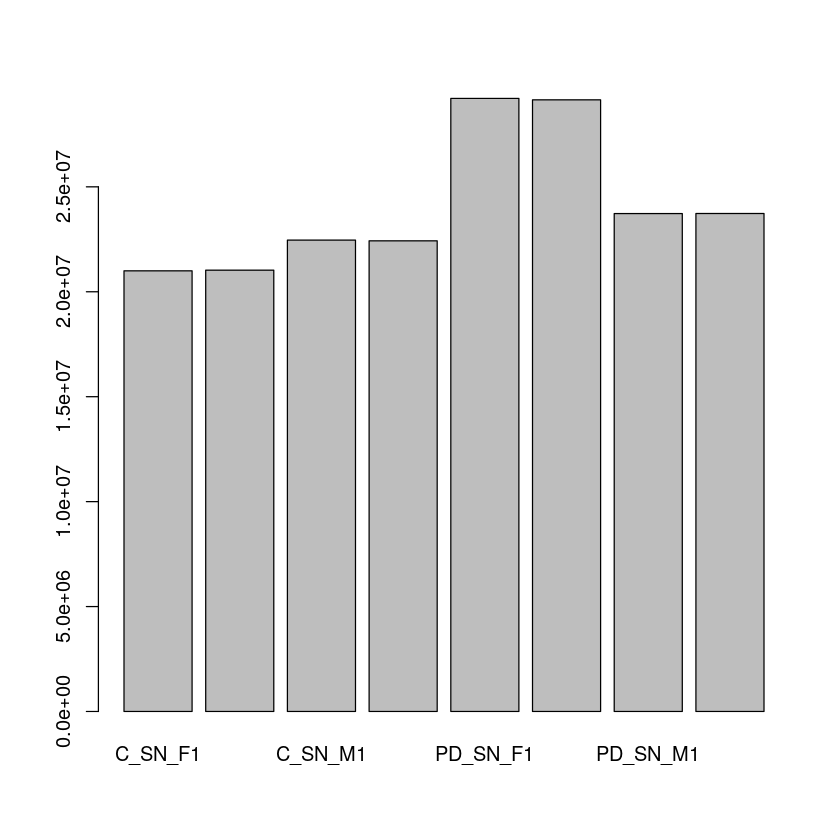

In [13]:
# 
barplot(colSums(cts))

**Generate a dataframe containing metadata on our sample:**

In [14]:
coldata <- data.frame(
    row.names = c("C_SN_F1", "C_SN_F2", "C_SN_M1", "C_SN_M2", "PD_SN_F1", "PD_SN_F2", "PD_SN_M1", "PD_SN_M2"),
    condition = c("control", "control", "control", "control","Parkinson", "Parkinson", "Parkinson", "Parkinson") # Specify wether the sample was treated with nutlin or not
)

In [15]:
coldata

,condition
,<fct>
C_SN_F1,control
C_SN_F2,control
C_SN_M1,control
C_SN_M2,control
PD_SN_F1,Parkinson
PD_SN_F2,Parkinson
PD_SN_M1,Parkinson
PD_SN_M2,Parkinson


In [16]:
# Check that the columns of the count matrix and the rows of the coldata are in the same order:
all(rownames(coldata) == colnames(cts))

[1] TRUE

**Construct the DESeqDataSet:**

In [17]:
suppressWarnings(library("DESeq2"))

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply

In [18]:
# construct the DESeqDataSet 
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design = ~ condition)
dds

class: DESeqDataSet 
dim: 56648 8 
metadata(1): version
assays(1): counts
rownames(56648): DDX11L1 WASH7P ... AC213203.1 FAM231D
rowData names(0):
colnames(8): C_SN_F1 C_SN_F2 ... PD_SN_M1 PD_SN_M2
colData names(1): condition

**Set the order of the PD and control group. Our control group is the baseline, so we set this as the first level:**

In [19]:
dds$condition <- factor(dds$condition, levels = c("control","Parkinson"))

**Prefiltering: to only keep genes that have at least 10 for a minimum of 2 samples:**

In [20]:
smallestGroupSize <- 2
keep <- rowSums(counts(dds) >= 10) >= smallestGroupSize
dds <- dds[keep,]

In [21]:
dim(dds)

[1] 21300     8

## Step 2. Model read counts and performing differential expression analysis
**The distribution of the expression of genes in one of the samples (C_SN_F1):**

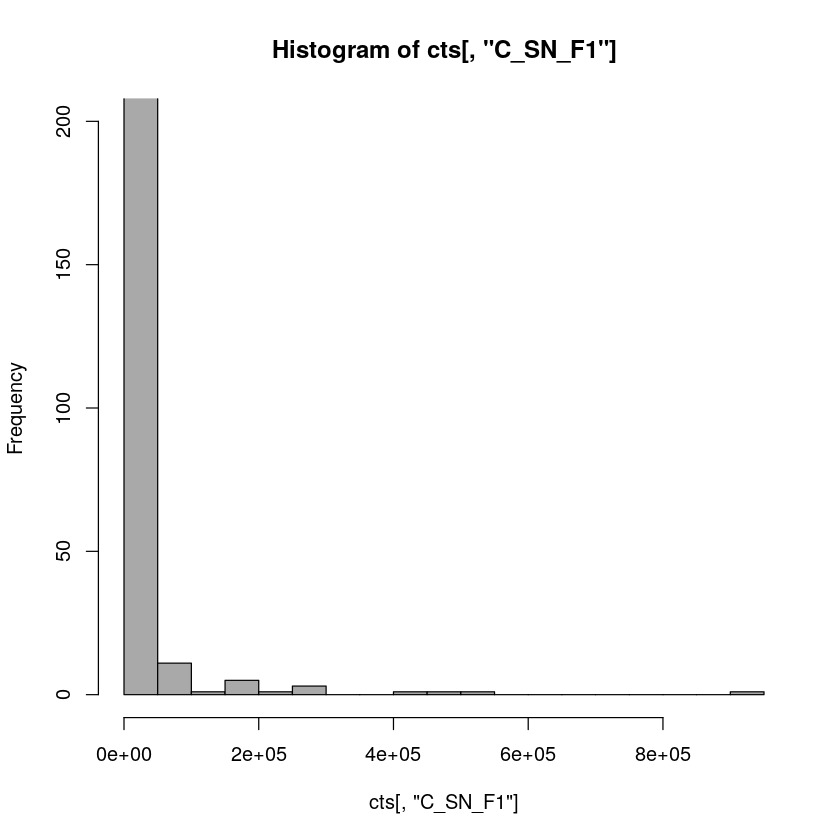

In [22]:
hist(cts[, 'C_SN_F1'], ylim=c(0, 200) , col = "darkgray")
# x-axis: expression count levels for each gene 

**Plot mean-variance scatter plot for gene expression counts:**\
Points (Genes): Each point represents a gene, with its mean expression level on the x-axis and its variance on the y-axis (both axes are log-transformed). Genes with higher mean expression levels are plotted further to the right, while genes with more variable expression are higher up on the y-axis.

Warning message:
“Transformation introduced infinite values in continuous y-axis”


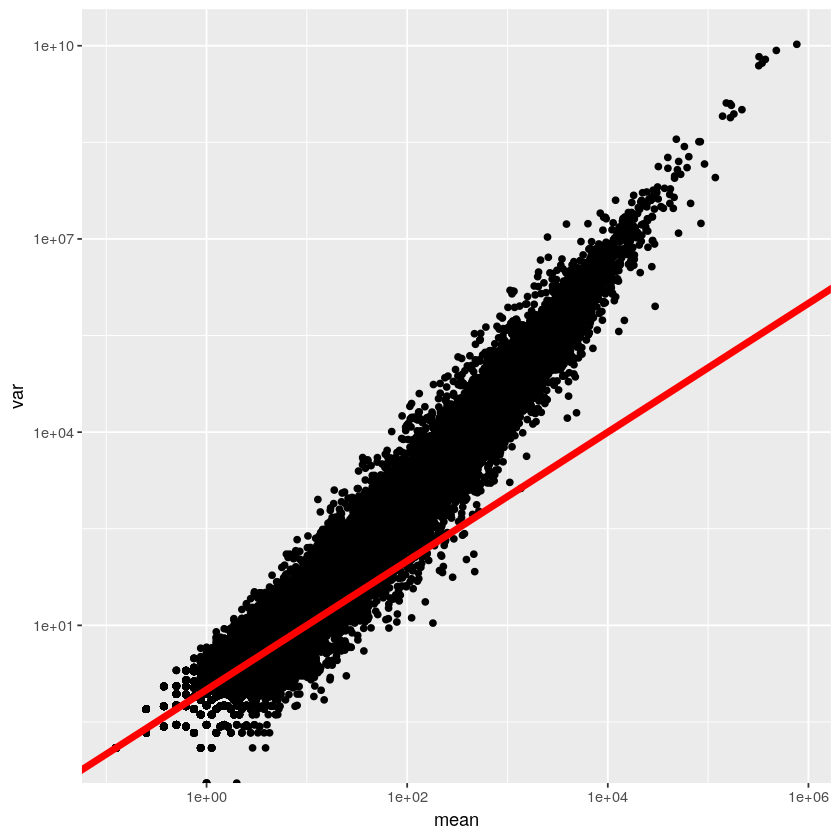

In [23]:
library(ggplot2)

data <- data.frame(
    mean = rowMeans(cts[rowSums(cts) != 0, ]),
    var  = rowVars(cts[rowSums(cts) != 0, ]))

ggplot(data, aes(x = mean, y = var)) +
    geom_point() +
    scale_x_continuous(trans = "log10") +
    scale_y_continuous(trans = "log10") +
    geom_abline(intercept = 0, slope = 1, color = "red", linewidth = 2)

# Red line: the case where the variance equals the mean

The **size factors** $s_{j}$ can be estimated for each sample using the function
    
        estimateSizeFactors

In [24]:
dds <- estimateSizeFactors(dds)

In [25]:
dds@colData

DataFrame with 8 rows and 2 columns
         condition        sizeFactor
          <factor>         <numeric>
C_SN_F1    control 0.801548492089805
C_SN_F2    control 0.798588729395745
C_SN_M1    control   0.9284861321293
C_SN_M2    control 0.924786967431979
PD_SN_F1 Parkinson  1.32181857112992
PD_SN_F2 Parkinson  1.31645583318395
PD_SN_M1 Parkinson  1.03856971230013
PD_SN_M2 Parkinson  1.03539839073132

The **dispersion** $\alpha_{i}$ can be estimated using the function

    estimateDispersions

In [26]:
dds <- estimateDispersions(dds)

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



In [27]:
head(mcols(dds))

DataFrame with 6 rows and 10 columns
                   baseMean          baseVar   allZero        dispGeneEst
                  <numeric>        <numeric> <logical>          <numeric>
FO538757.1 22.9330113494676 34.8984405607897     FALSE 0.0208050882453816
AP006222.1 28.3486654935949 105.966757112164     FALSE   0.10862062032418
AL732372.2  7.5009892132341 5.07937041574756     FALSE              1e-08
MTND1P23    23.908095469077  191.36978907635     FALSE  0.134736361690016
MTND2P28   11214.7602719817 7636989.98694888     FALSE 0.0606311478623918
MTCO1P12   824.016021107294 219010.833010848     FALSE  0.262646653141279
           dispGeneIter             dispFit         dispersion  dispIter
              <numeric>           <numeric>          <numeric> <integer>
FO538757.1           31   0.190159494981791 0.0755059083112449         8
AP006222.1            8   0.155432341015602   0.12322302528723         8
AL732372.2            1   0.564145359094545  0.138525600951373         9
MTND1P

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


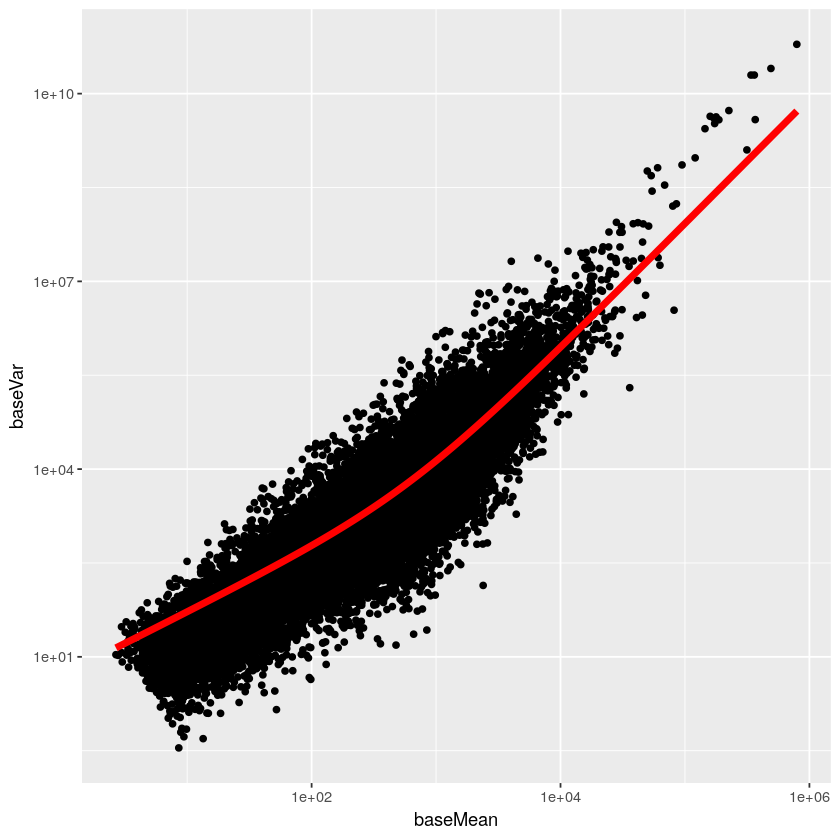

In [28]:
ggplot(as.data.frame(mcols(dds)[!mcols(dds)$allZero, ])) +
    geom_point(aes(x = baseMean, y = baseVar )) + 
    geom_line(aes(x = baseMean, y = baseMean + dispFit * baseMean * baseMean ), color = "red", size = 2) +
    scale_x_continuous(trans = "log10") +
    scale_y_continuous(trans = "log10")

# red line now fits the data better

In [29]:
table(colData(dds))

           sizeFactor
condition   0.798588729395745 0.801548492089805 0.924786967431979
  control                   1                 1                 1
  Parkinson                 0                 0                 0
           sizeFactor
condition   0.9284861321293 1.03539839073132 1.03856971230013 1.31645583318395
  control                 1                0                0                0
  Parkinson               0                1                1                1
           sizeFactor
condition   1.32181857112992
  control                  0
  Parkinson                1

Finally **fit the GLM for each gene** to obtain $\beta_j$, the log2FC of each gene across the two conditions. using the function:

    nbinomWaldTest

In [30]:
dds <- nbinomWaldTest(dds)

In [31]:
# Visualize the result using results()
res <- results(dds)
res

log2 fold change (MLE): condition Parkinson vs control 
Wald test p-value: condition Parkinson vs control 
DataFrame with 21300 rows and 6 columns
                   baseMean      log2FoldChange             lfcSE
                  <numeric>           <numeric>         <numeric>
FO538757.1 22.9330113494676   0.232062378041935 0.353762068235417
AP006222.1 28.3486654935949  0.0165353532530386  0.40651861878448
AL732372.2  7.5009892132341  -0.531072468534394 0.533153758852165
MTND1P23    23.908095469077   -1.13694984528987  0.45128664525914
MTND2P28   11214.7602719817 -0.0631869145950148 0.227482408548203
...                     ...                 ...               ...
MT-ND6     53542.0665267457   -1.08510161336498 0.167867300637257
MT-TE      141.580397128547  -0.954847797977944 0.836398203227619
MT-CYB     225360.853993379  -0.791161843365453 0.161927429040512
MT-TT      225.723525009341  -0.946343053930226 0.761231787488838
MT-TP      2266.16561925737   -1.10699587899522   1.289546562

In [32]:
# The three function estimateSizeFactors, estimateDispersions, nbinomWaldTest
# can be run in one wrap function: DESeq()
# dds <- DESeq(dds)
res <- results(dds)
res

log2 fold change (MLE): condition Parkinson vs control 
Wald test p-value: condition Parkinson vs control 
DataFrame with 21300 rows and 6 columns
                   baseMean      log2FoldChange             lfcSE
                  <numeric>           <numeric>         <numeric>
FO538757.1 22.9330113494676   0.232062378041935 0.353762068235417
AP006222.1 28.3486654935949  0.0165353532530386  0.40651861878448
AL732372.2  7.5009892132341  -0.531072468534394 0.533153758852165
MTND1P23    23.908095469077   -1.13694984528987  0.45128664525914
MTND2P28   11214.7602719817 -0.0631869145950148 0.227482408548203
...                     ...                 ...               ...
MT-ND6     53542.0665267457   -1.08510161336498 0.167867300637257
MT-TE      141.580397128547  -0.954847797977944 0.836398203227619
MT-CYB     225360.853993379  -0.791161843365453 0.161927429040512
MT-TT      225.723525009341  -0.946343053930226 0.761231787488838
MT-TP      2266.16561925737   -1.10699587899522   1.289546562

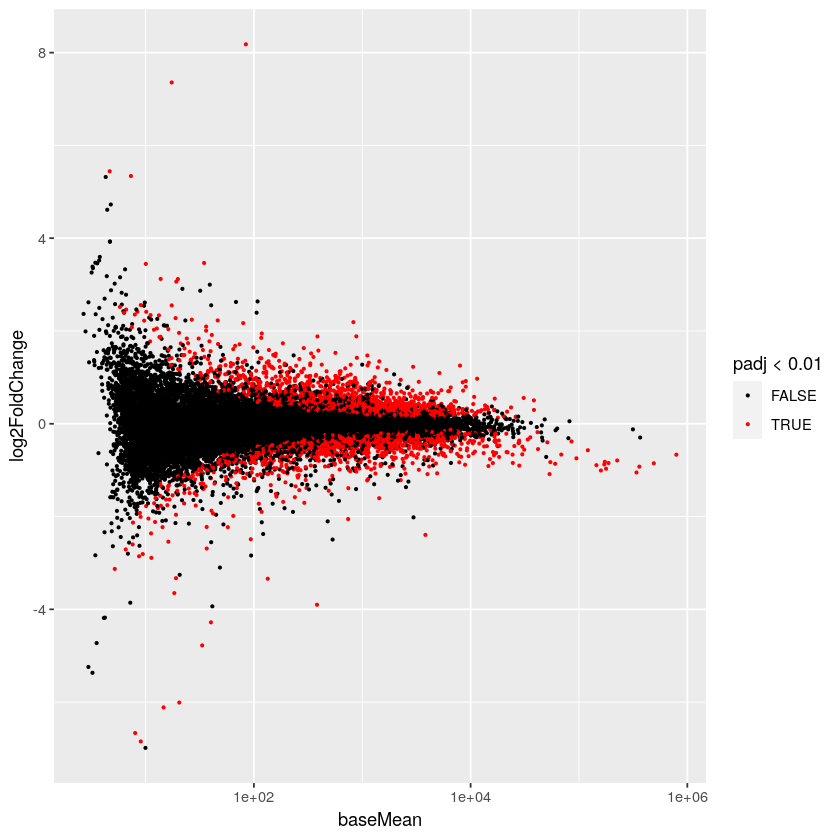

In [33]:
# using the pre-filtered dataset (keep genes that have a count of at least 10 for a minimum of 2 samples)
ggplot(as.data.frame(res), aes(x = baseMean, y = log2FoldChange)) + 
    geom_point(aes(colour = padj < 0.01), size = 0.5) + 
    scale_x_continuous(trans = "log10") +
    scale_color_manual(name = "padj < 0.01", values = setNames(c("red", "black"), c(T, F)))

Genes with a low mean (left of the plot) have a big variance of the log2foldchange.

**Plot the standard error of the log2foldchange vs the mean:**

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


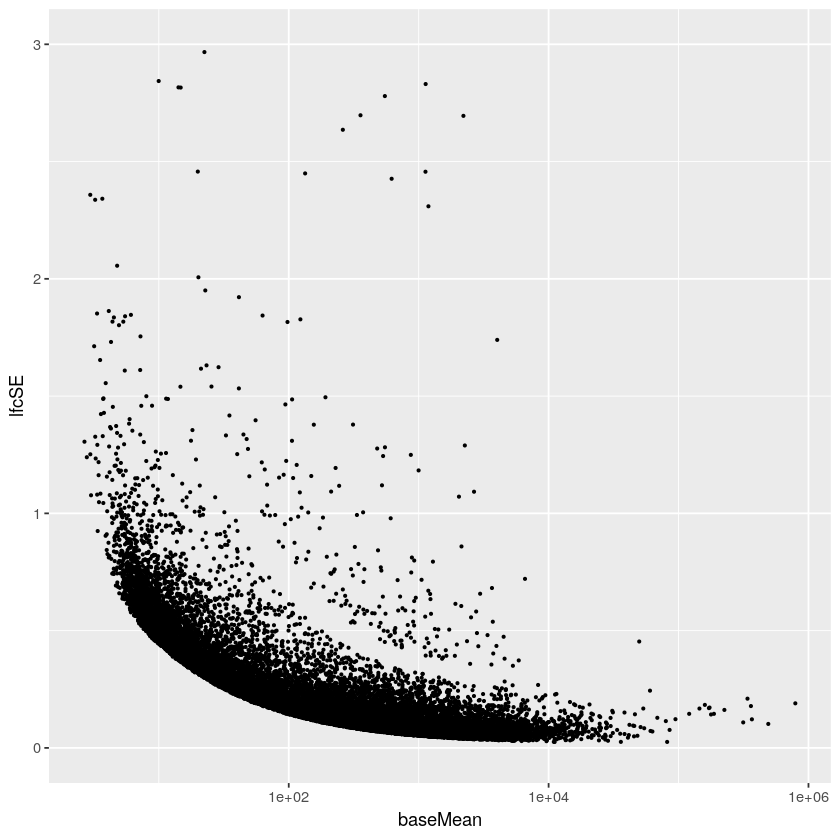

In [34]:
ggplot(as.data.frame(res), aes(x = baseMean, y = lfcSE)) +
    geom_point(size = 0.5) +
    scale_x_continuous(trans = "log10") +
    ylim(0, 3)

The `lfcShrink` function is used to *shrink* Log2FoldChange towards zero in such a manner that the shrinkage is stronger when the available information for a gene is low (i.e. low number of counts --> dispersion is higher).

In [35]:
resultsNames(dds)

[1] "Intercept"                      "condition_Parkinson_vs_control"

We want to shrink the coefficient `condition_Parkinson_vs_control` as this stores our Log2FoldChange values.

In [36]:
resLFC <- lfcShrink(dds, coef="condition_Parkinson_vs_control")

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895



In [37]:
resLFC

log2 fold change (MAP): condition Parkinson vs control 
Wald test p-value: condition Parkinson vs control 
DataFrame with 21300 rows and 6 columns
                   baseMean      log2FoldChange              lfcSE
                  <numeric>           <numeric>          <numeric>
FO538757.1 22.9330113494676   0.110297646345783  0.167946405683885
AP006222.1 28.3486654935949  0.0067283453590894  0.165164901843953
AL732372.2  7.5009892132341  -0.151289089542258  0.151705387333268
MTND1P23    23.908095469077  -0.403934453948117  0.161438548020182
MTND2P28   11214.7602719817 -0.0433494307445698  0.156067065163252
...                     ...                 ...                ...
MT-ND6     53542.0665267457  -0.868322138721924  0.134381235137552
MT-TE      141.580397128547  -0.129933975678344  0.116415699111304
MT-CYB     225360.853993379   -0.64214205480688  0.131449488967531
MT-TT      225.723525009341  -0.151395125997243    0.1243173813056
MT-TP      2266.16561925737 -0.0677692421254779 0

**MA plot using padj<0.01 as threshold:**

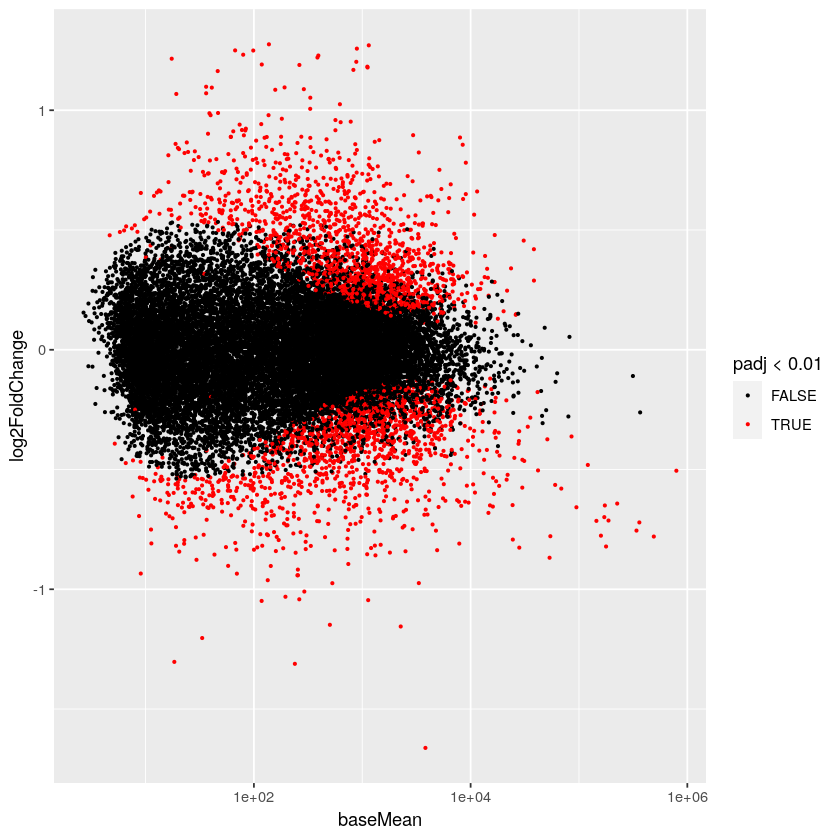

In [38]:
ggplot(as.data.frame(resLFC), aes(x = baseMean, y = log2FoldChange)) +
    geom_point(aes(colour = padj < 0.01), size = 0.5) +
    scale_x_continuous(trans = "log10") +
    scale_color_manual(name = "padj < 0.01", values = setNames(c("red", "black"), c(T, F)))

?There are much more downregulated genes when using padj<0.1 as a threshold.  

It seems that there may be plenty of downregulated genes in schizophrenia cells, but a lot of them are not significant when the adjusted p-value is strict (i.e. they all have relatively large p-values). They also generally have low baseMean (corresponding to normalized read counts).

**Plot the standard error of the log2foldchange vs the mean:**

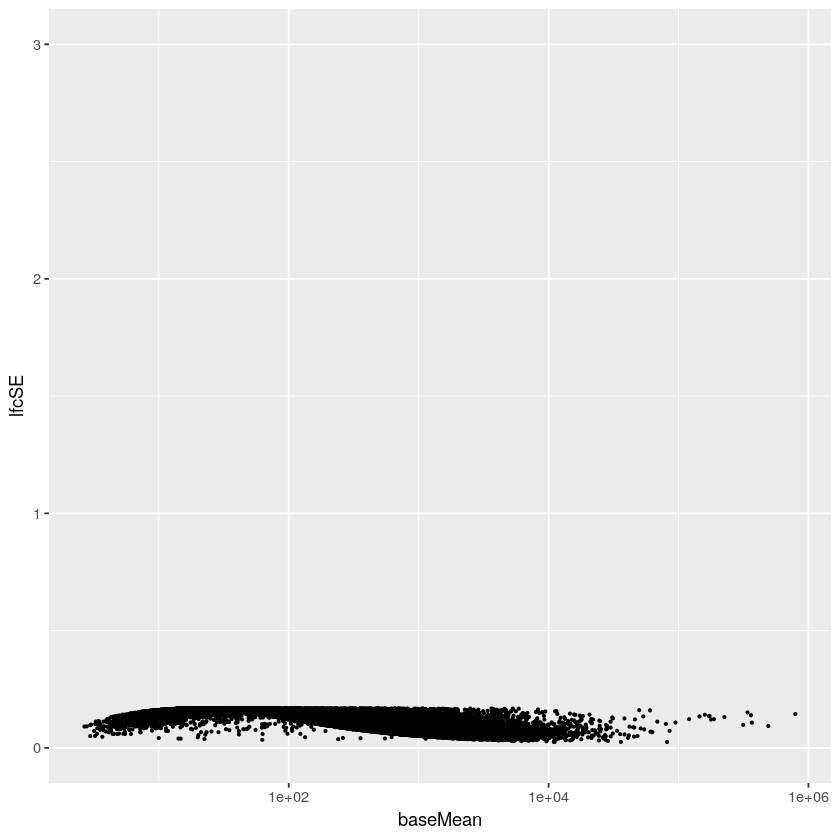

In [39]:
ggplot(as.data.frame(resLFC), aes(x = baseMean, y = lfcSE)) +
    geom_point(size = 0.5) +
    scale_x_continuous(trans = "log10") +
    ylim(0, 3)

## Step 3. Downstream analysis
### Getting a list of up- or downregulated genes
To manipulate dataframe we use the package dplyr

In [40]:
suppressWarnings(library(dplyr))

In [41]:
resLFC_df <- as.data.frame(resLFC)

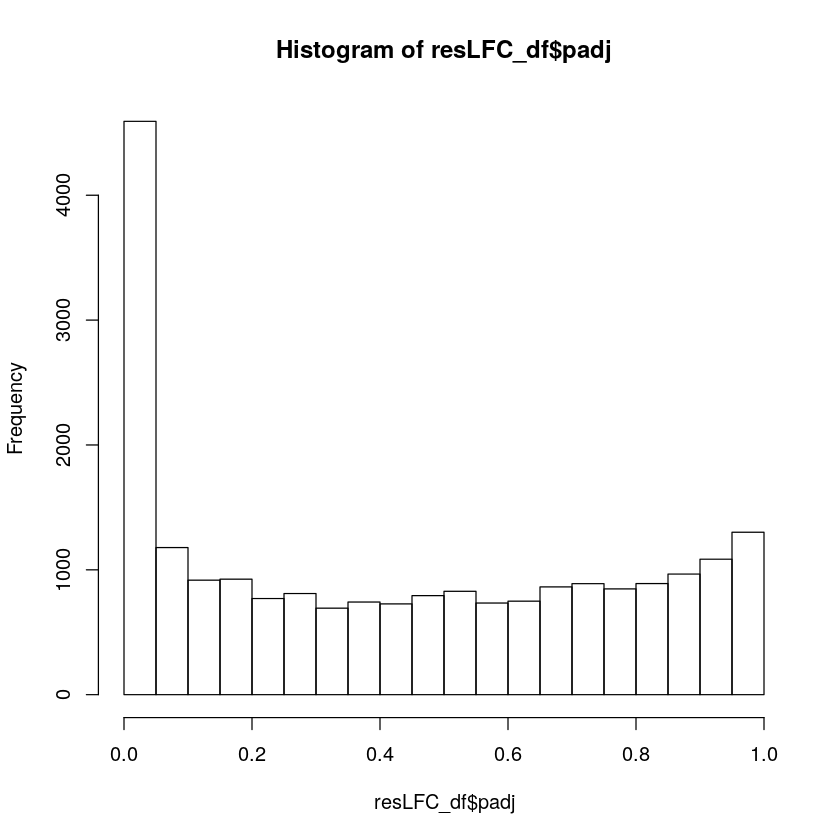

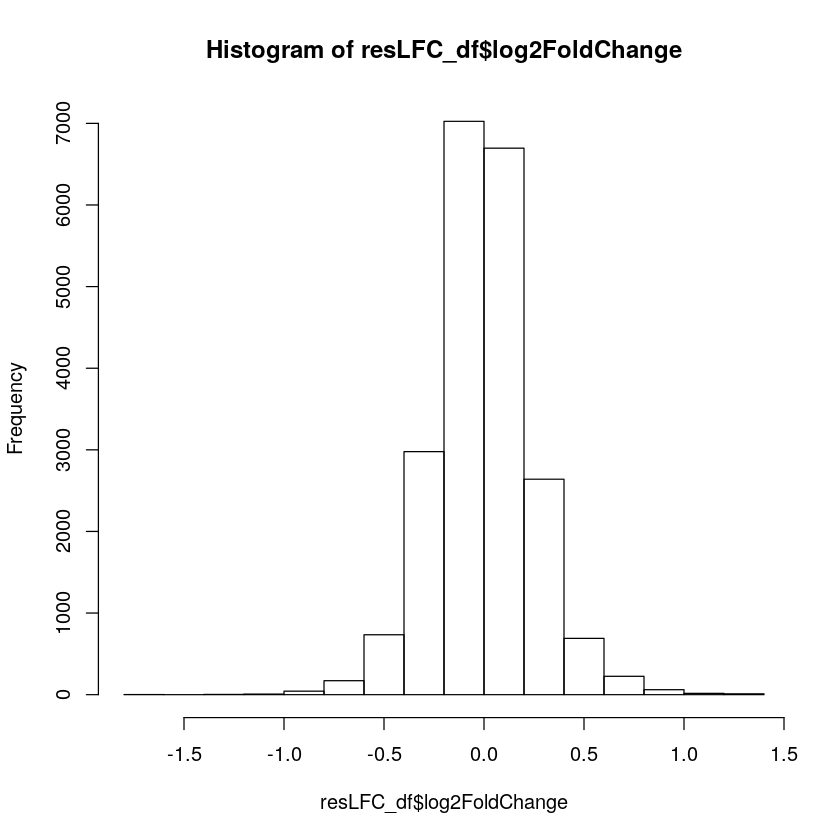

In [42]:
# Plot histograms of padj values and log2FoldChange:
hist(resLFC_df$padj)
hist(resLFC_df$log2FoldChange)

**Define upregulated and downregulated genes using padj<0.01 as threshold:**

In [43]:
log2FC_thr = 1
pad_thr = 0.01

In [44]:
upregulated_genes <- row.names(resLFC_df %>% 
    filter(log2FoldChange > log2FC_thr, padj < pad_thr))

In [45]:
downregulated_genes <- row.names(resLFC_df %>% 
    filter(log2FoldChange < log2FC_thr, padj < pad_thr))

### Sorting the gene list based on log2FC values

In [48]:
resLFC_df %>%
    arrange(log2FoldChange)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HBB,3826.970008,-1.6622507,0.15430702,-10.836274,2.317161e-27,1.203737e-24
PRLHR,238.787438,-1.3112483,0.12639765,-10.338654,4.711102e-25,1.967486e-22
ALAS2,18.427922,-1.3031305,0.16613434,-7.183048,6.817403e-13,6.389275e-11
KRT14,33.312575,-1.2035646,0.15934787,-7.818666,5.338612e-15,7.242491e-13
PPDPF,2264.187942,-1.1553672,0.07226224,-15.984457,1.639893e-57,6.985617e-54
GPR27,502.453666,-1.1483451,0.07788633,-14.725151,4.444759e-49,8.606266e-46
MT-TC,117.846273,-1.0486524,0.16686179,-6.331956,2.420721e-10,1.298714e-08
MIR219A2,1134.071346,-1.0454091,0.11005785,-9.495657,2.188275e-21,6.564516e-19
SFRP5,262.236391,-1.0419280,0.14930797,-6.978984,2.973216e-12,2.398732e-10


In [49]:
write.table(resLFC_df, "RNAseq.results.tsv", sep="\t", col.names=NA, quote=FALSE)

### Plotting a heatmap

In [50]:
library(pheatmap)

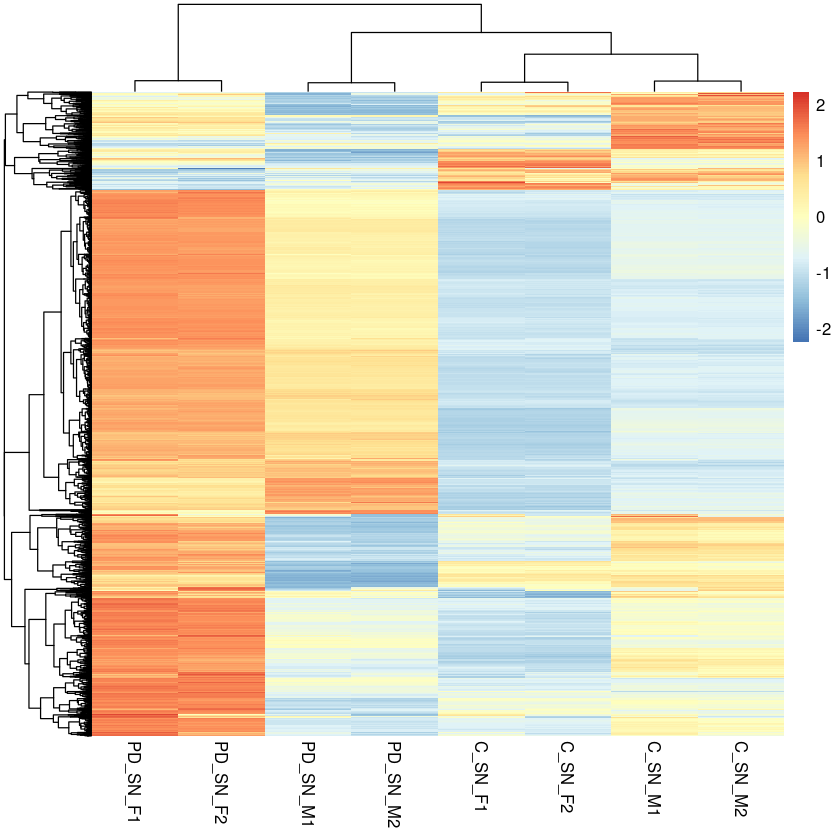

In [51]:
pheatmap(cts[c(upregulated_genes, downregulated_genes), ], scale = "row", show_rownames = F)


# PART 3: Functional analysis of gene signature

In [1]:
pwd

/mnt/storage/r0965964/jupyternotebooks/transcriptomics_assignment


In [5]:
ls

alignment  fastq_files       Homo_sapiens.GRCh38.90.gtf  QC_results
counts     fastq_files_test  PD_SN_bulkRNAseq.ipynb      RNAseq.results.tsv


In [7]:
head RNAseq.results.tsv
# I added the 'Gene' in the header of .tsv

Gene	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
FO538757.1	22.9330113494676	0.110297646345783	0.167946405683885	0.655984343373707	0.511834198040019	0.706929290192229
AP006222.1	28.3486654935949	0.0067283453590894	0.165164901843953	0.0406755127292337	0.967554583446413	0.986165881029984
AL732372.2	7.5009892132341	-0.151289089542258	0.151705387333268	-0.996096266258627	0.319203373842052	0.534947997766504
MTND1P23	23.908095469077	-0.403934453948117	0.161438548020182	-2.51935185149785	0.011757110488227	0.0535170688175495
MTND2P28	11214.7602719817	-0.0433494307445698	0.156067065163252	-0.277766157824136	0.781191871383005	0.889812592576428
MTCO1P12	824.016021107294	-0.277054835506222	0.152852422627424	-1.83648841136988	0.0662854544680524	0.18968344682454
MTCO2P12	53.4140408769363	-0.21899394762953	0.138427664918264	-1.61228311383565	0.106900346153739	0.264291407165234
MTATP8P1	36.7075265129564	-0.276227172031635	0.155082516534884	-1.79809891261341	0.0721613345366542	0.201545719690362
MTAT

In [8]:
head -1 RNAseq.results.tsv
grep -n OR7C1 RNAseq.results.tsv
grep -n MTRNR2L8 RNAseq.results.tsv
grep -n KLF5 RNAseq.results.tsv

Gene	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
19425:OR7C1	79.6370040612765	1.23173661401495	0.165751746561323	7.37023551685859	1.70326860874609e-13	1.74413067777322e-11
11079:MTRNR2L8	47.6152766503533	0.0244993653992999	0.164970337342867	0.148606380065838	0.881864238352172	0.945333253443198
14290:KLF5	44.2232419073017	0.246728649459346	0.15376313848628	1.60153815331367	0.109257776577281	0.268313315268016


**List all the downregulated genes (using padj<0.05):**

In [9]:
# Filter the file using awk 
# $3!=NA: genes without detected expression
# logFC above & padj lower than the thresholds
awk '$3 != "NA" && $3 < 1 && $7 < 0.05 {print ;}' RNAseq.results.tsv | head

MTATP6P1	18341.2281558402	-0.568349755378805	0.136112592698763	-4.17634953823633	2.96224523536758e-05	0.000406002968263154
LINC01128	288.164757991527	0.266677369075177	0.0938311239229042	2.84069771873996	0.00450149586876479	0.0254451593707063
KLHL17	173.048056907966	0.329497193937897	0.10532283403112	3.1248324376014	0.00177906369704586	0.0122708153119753
HES4	186.818457586768	-0.481045427430542	0.127055042904509	-3.78566603165221	0.000153297440726791	0.00166347454332798
AGRN	2226.03714606195	0.227059750034772	0.0716061620072953	3.1707970038456	0.00152021337108271	0.0108146374718405
SDF4	2103.32933952603	-0.217716763659326	0.0577304141394154	-3.77126589972313	0.000162421487926267	0.00174036026110768
DVL1	2016.4200618425	-0.153375108959838	0.0506052726730144	-3.03086216725864	0.00243856538868889	0.0156706576703606
MXRA8	488.736912194225	-0.286754199020754	0.0802544471239834	-3.57304594687127	0.00035285281878745	0.00329197469995561
AURKAIP1	1469.16026389864	-0.338801039756868	0.0666299446

In [8]:
# print up-regulated genes
awk '$3 != "NA" && $3 > 1 && $7 < 0.05 {print $1}' RNAseq.results.tsv 

RAB3B
PTGER3
NBPF26
TCHH
SYT2
SOWAHB
DDIT4L
GABRG2
CNR1
TMEM196
VSTM2A
PSPHP1
TRPC5
HTR2C
AFF2
PENK
LINC02393
CCDC177
RAB27B
PCSK2
CLEC17A
OR7C1
OR7A5
GIPR
FAM118A
SLC5A3


In [6]:
# print down regulated genes
awk '$3 != "NA" && $3 < -1 && $7 < 0.05 {print $1}' RNAseq.results.tsv 

GPR27
ALAS2
GADD45G
MIR219A2
HBB
SFRP5
PRLHR
KRT14
DNAH17-AS1
PPDPF
MT-TC


The original paper reported the up/down-regulated genes shown below.
**The top 5 upregulated DEGs**: OR7C1 (log2FC = 2.05), MTRNR2L8 (log2FC = 1.94), processed pseudogene MTCYBP18 (ENSG00000244921, log2FC = 1.94), PCDH20 (log2FC = 1.61) and KLF5 (log2FC = 1.50)
**The top 5 downregulated DEGs**: TPH2 (log2FC = −1.98), LOC101929445 (log2FC = −1.96), ADRA1D (log2FC = −1.63), IL1B (log2FC = −1.62) and DOK7 (log2FC = −1.58).

In this analysis, while OR7C1 was confirmed to be significantly upregulated, the expression profiles of the other deregulated genes showed notable discrepancies compared to the original paper's results. 

In [14]:
# Write files for significantly up-/down-regulated genes
awk '$3 != "NA" && $3 > 1 && $7 < 0.05 {print $1}' RNAseq.results.tsv > up-logFC1-p05.txt
awk '$3 != "NA" && $3 < -1 && $7 < 0.05 {print $1}' RNAseq.results.tsv > down-logFC1-p05.txt

In [15]:
wc -l up-logFC1-p05.txt
wc -l down-logFC1-p05.txt

26 up-logFC1-p05.txt
11 down-logFC1-p05.txt


These upregulated and downregulated gene sets are used as an input of the following functional analysis.

## Gene Set Enrichment Analysis

**The list of upregulated genes are queried on [gProfiler](https://biit.cs.ut.ee/gprofiler/gost) for functional enrichment analysis:**

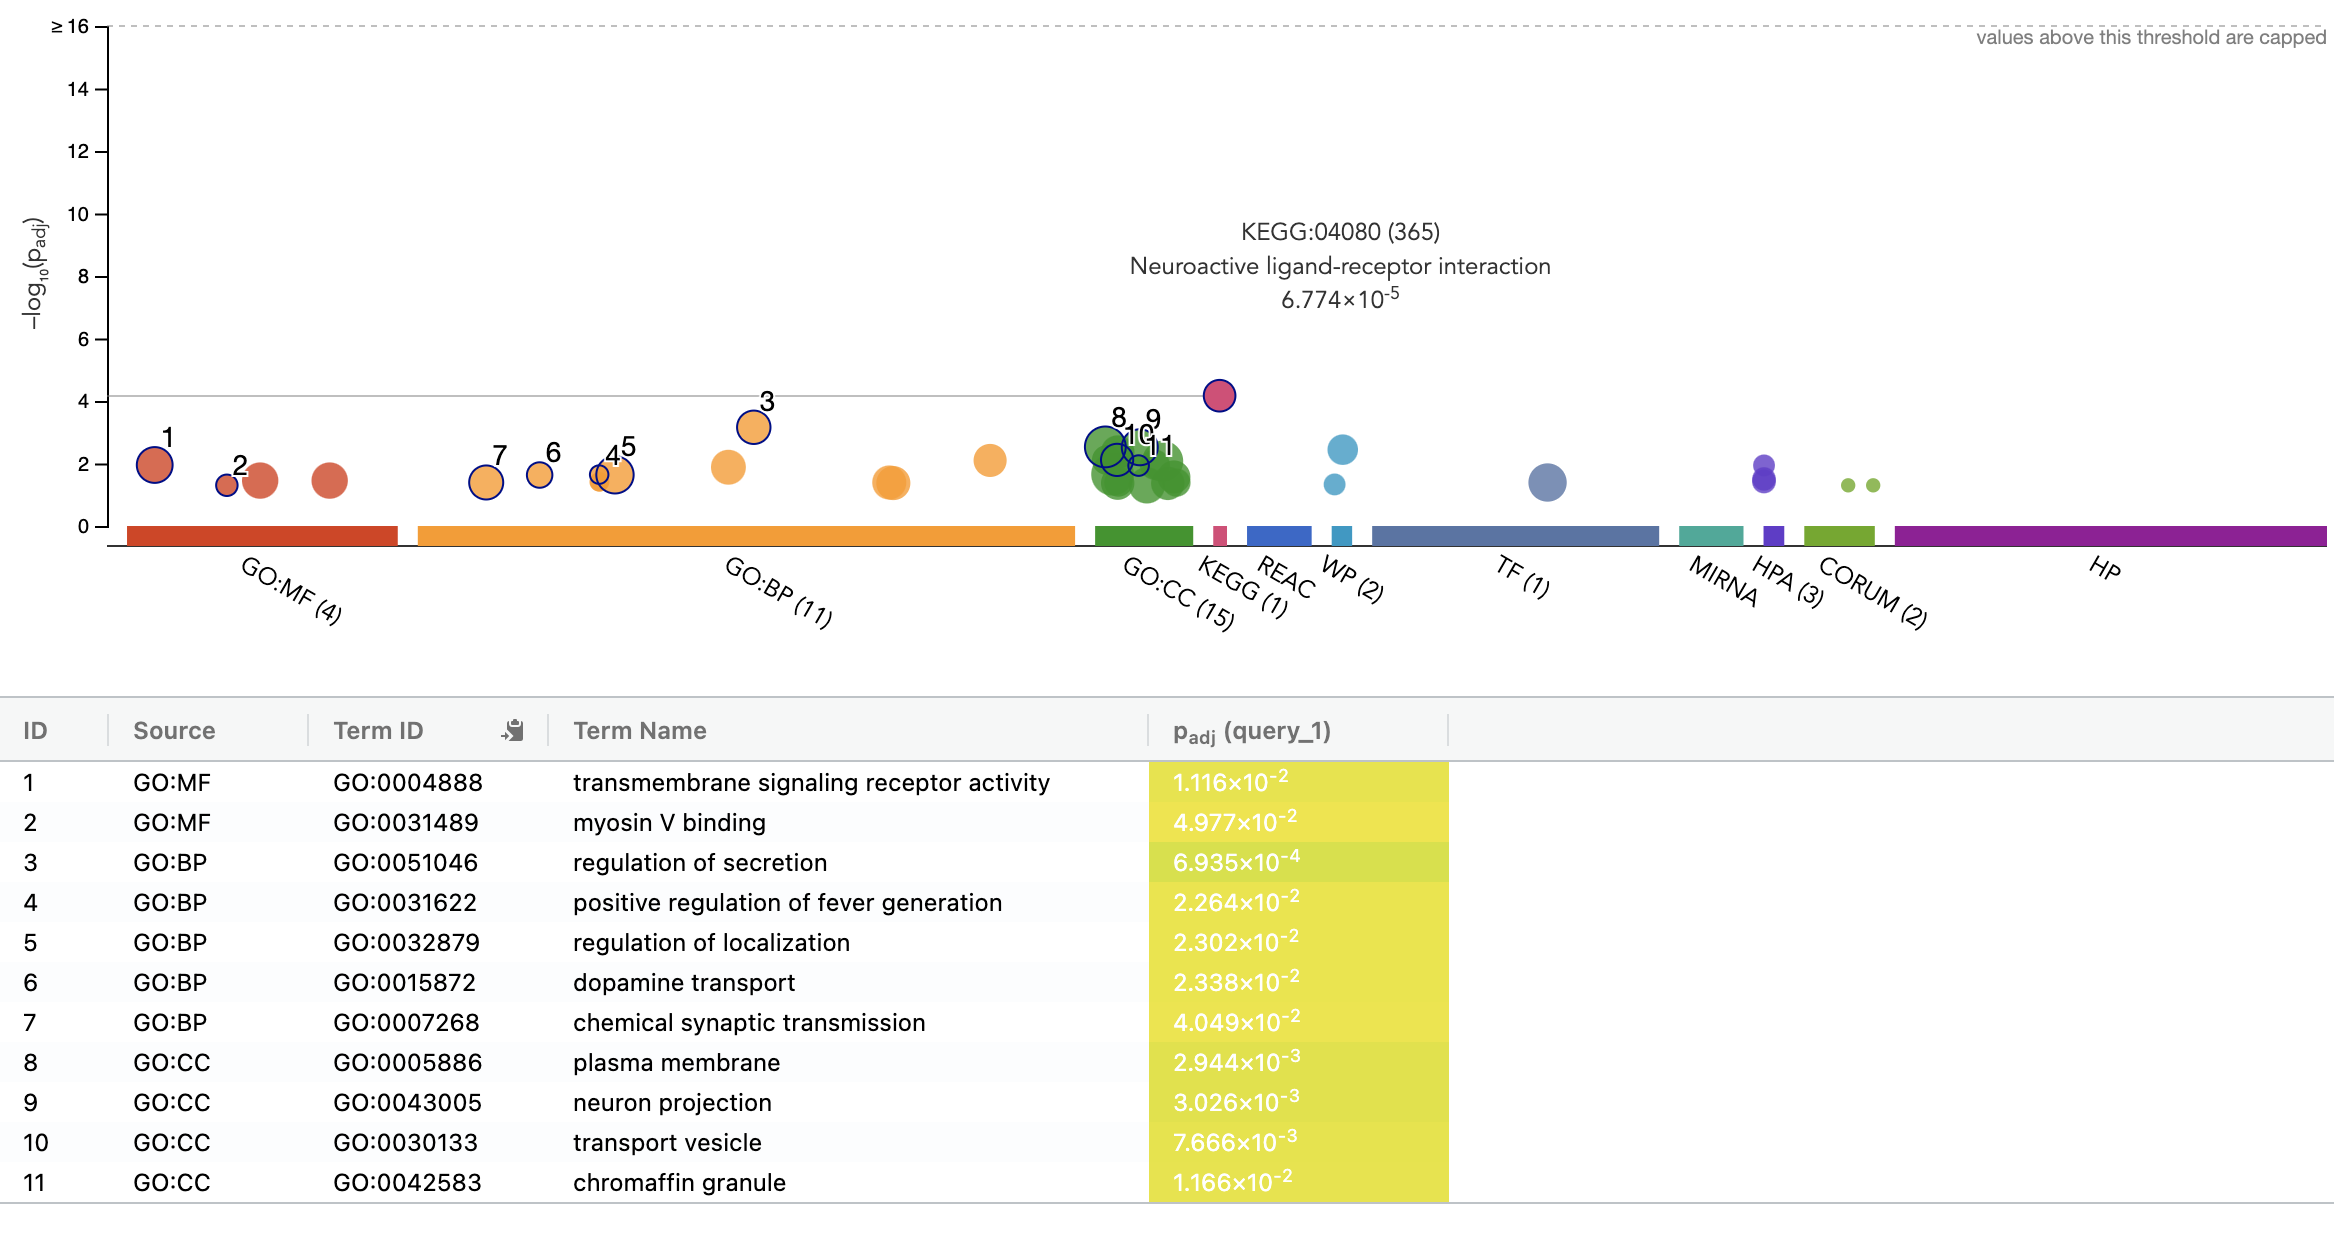

The significantly enriched pathways associated includes "Neuroactive ligand-receptor interaction","regulation of secretion", and "transmembrane signaling receptor activity", etc.

**In [humanmine.org](https://humanmine.org/humanmine), some of the upregulated genes are shown to be associated with regulation of secretion**
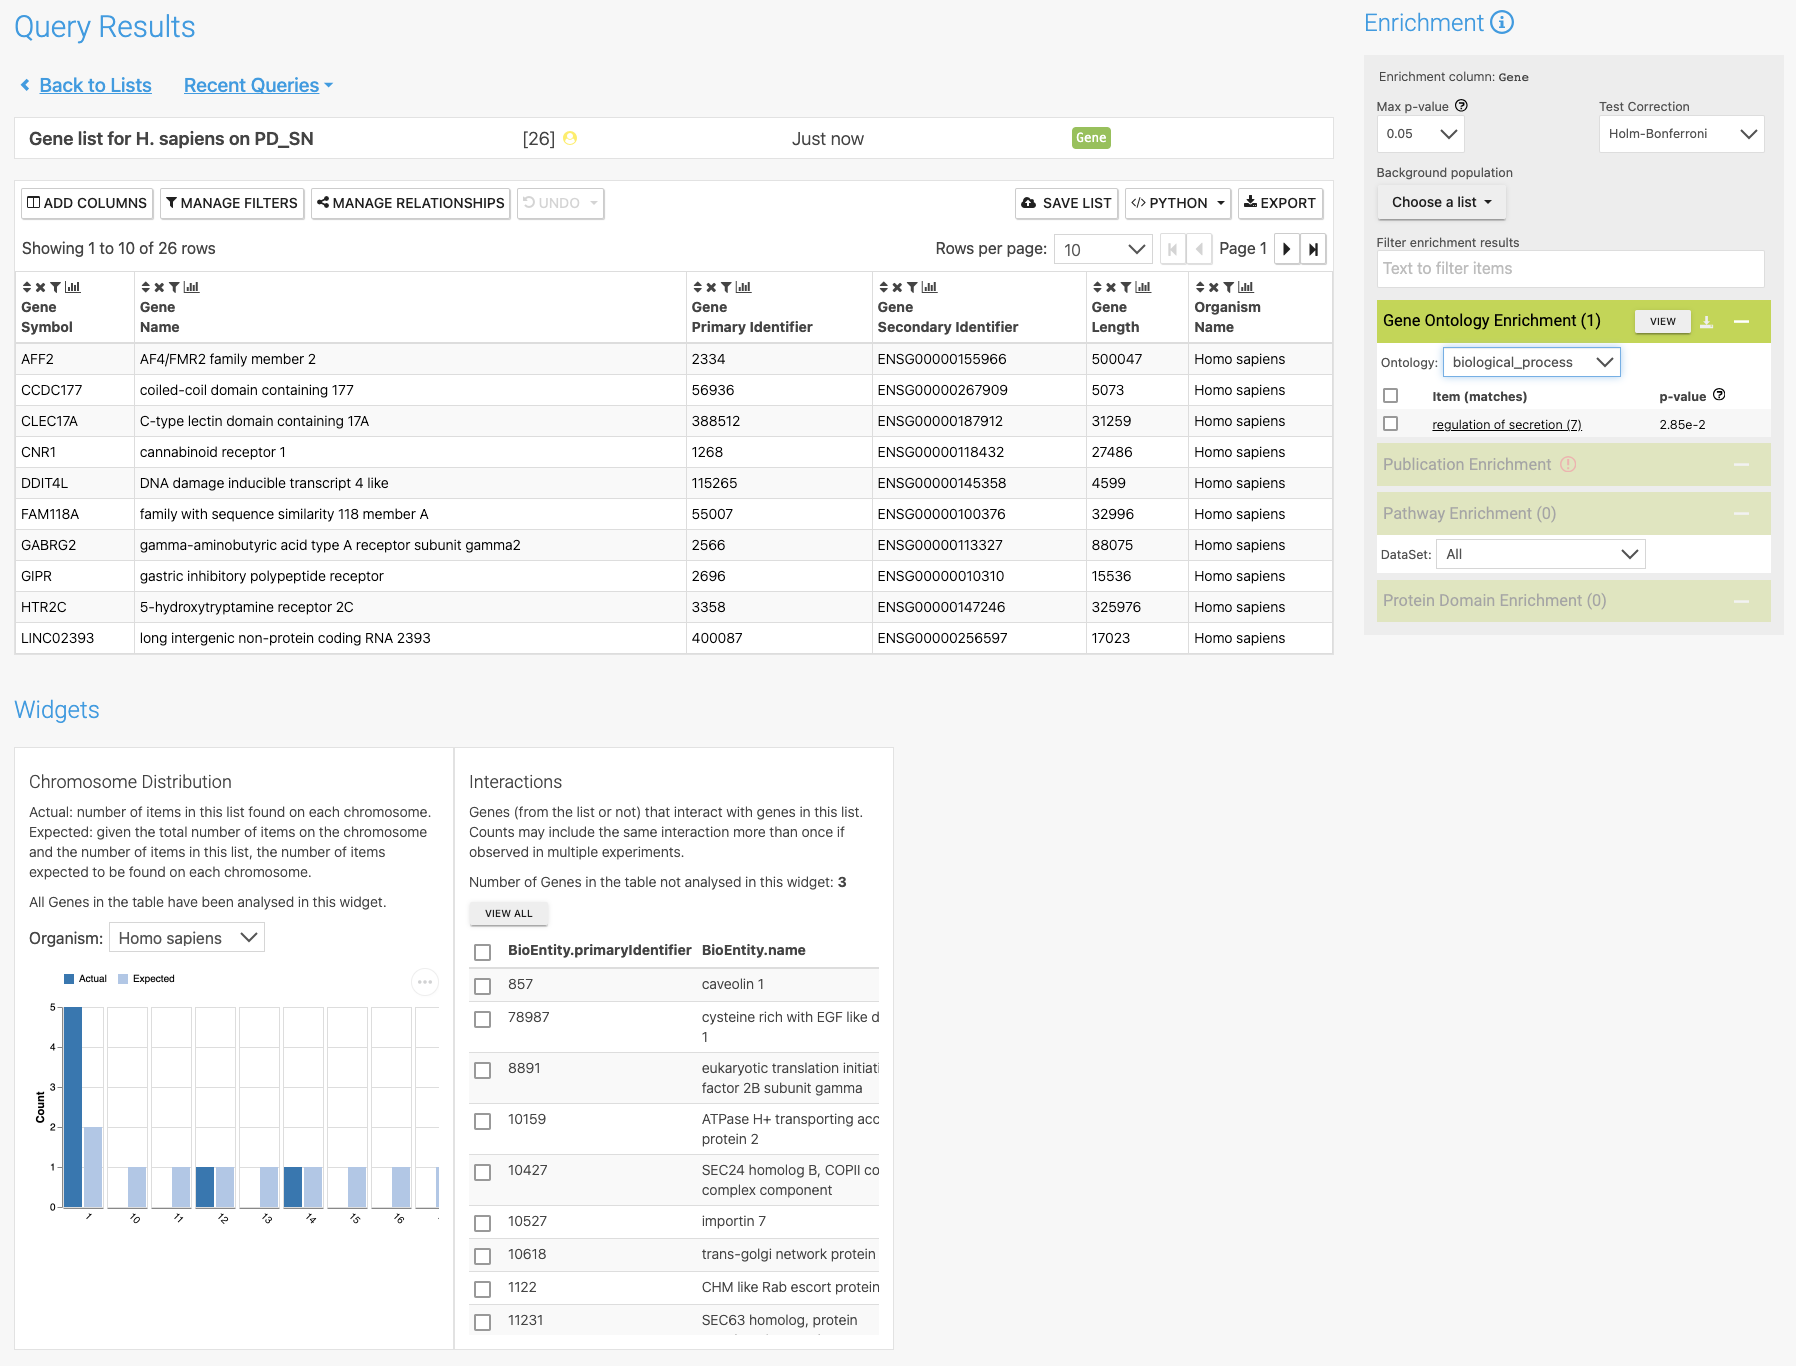

Associated pathway in secretion regulation
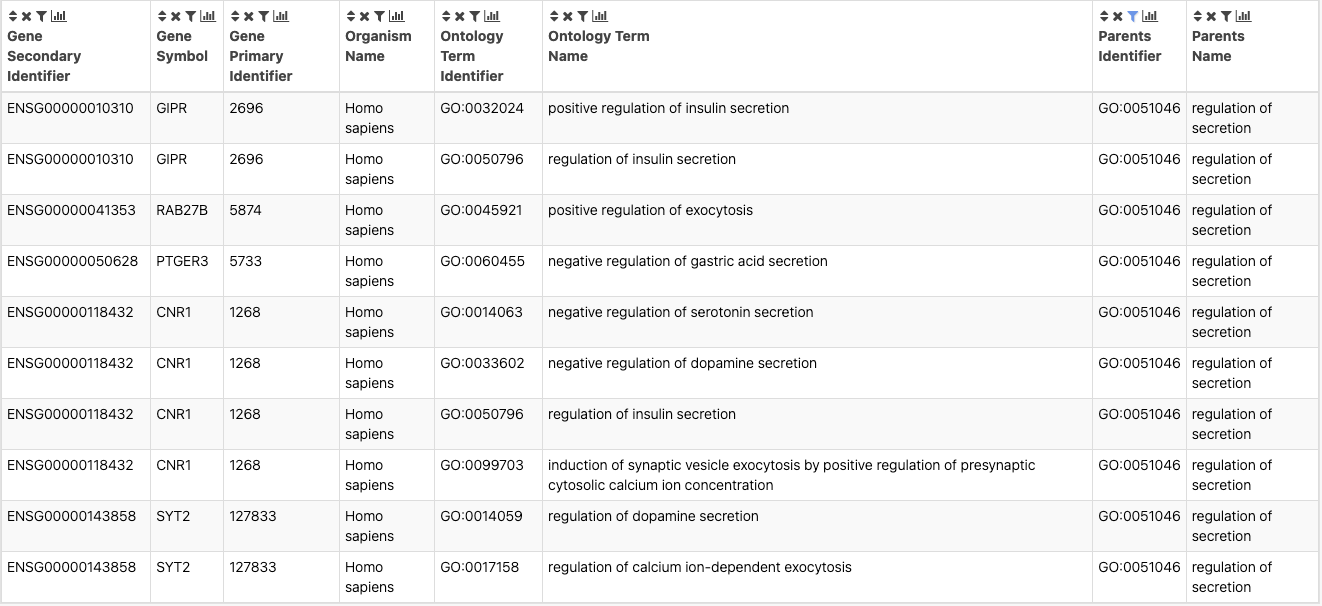

The pathway enrichment for "regulation of secretion" was also observed in this analysis.

In the original paper, the top significantly enriched pathways identified in the upregulated genes were “response to heat” and “chaperone-mediated protein folding.” However, the pathways associated with the upregulated gene set in this analysis yielded notably different results.

To further explore, I performed the same analysis using all DEGs (a combination of upregulated and downregulated genes) and downregulated DEGs as inputs.

Below, I present a table comparing the biological pathways enriched in the original paper's upregulated, downregulated, and all-DEGs with the pathways identified in this analysis.

<img src=attachment:table.png alt="Table" width="50%">
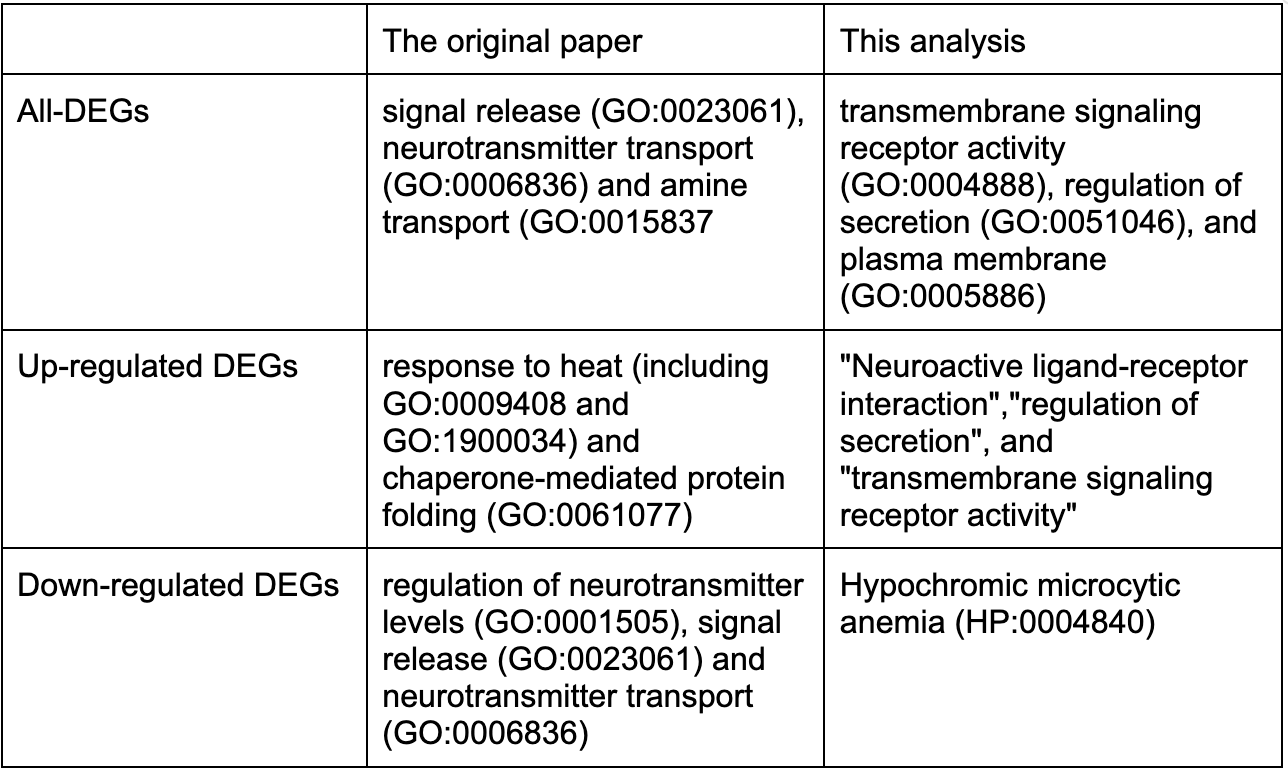

# Discussion and conclusions

The results of this analysis differ significantly from those reported in the reference paper. Several potential factors could explain these discrepancies:

* Sample Size: This analysis was conducted using data from only 4 individuals (8 FASTQ files: 4 PD cases and 4 controls) for computational efficiency, whereas the reference study included data from 10 individuals. The smaller sample size in this analysis likely reduced the statistical power and influenced the results.

* Input Gene Set: The reference paper identified 354 DEGs (152 upregulated and 202 downregulated) in the substantia nigra (SN) of Parkinson's disease (PD) patients compared to controls, a substantially larger set than the one used in this analysis (26 upregulated and 11 downregulated genes). The limited input dataset likely impacted the outcomes.

* Pathway Analysis Methodology: The reference paper employed the Rotation Gene Set Test (ROAST) to evaluate gene sets associated with metabolic and cellular signaling pathways linked to deregulated lipid classes in the SN. In contrast, this analysis used different tools (humanmine.org and gProfiler), which likely contributed to differences in the enrichment results.

Consequently, the findings of this analysis are not directly comparable to those of the original study and should be interpreted with caution. The GO term enrichment results generated here differ from those in the reference paper, highlighting the impact of methodological differences.\
For future studies, it will be important to experiment with a larger dataset, refine parameters, and consider employing methods more closely aligned with those used in the reference paper to improve comparability.
